In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from fit_funcs import *
import costfun.costfun as cost
import utils.figures as fig_help
import utils.tools as tools
from RandomMatrixTheory import goe
from Quad_tools import *

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import erf
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import gamma as Gamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import UnivariateSpline as InterpolateSpline
from scipy.interpolate import make_interp_spline as make_spline
from scipy.interpolate import splrep, splev
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists

DIM = 1
modello = 'RP'


def base_dir(model, d, BC = 0):
    """
    Base directory for input model for d-dimension
    """
    dirx = f"../results/{model}/" + (f"" if model == 'PLRB' or model == 'RP' else  f"dim={d}/") + ( '' if model == 'RP' else (f"PBC/" if BC else f"OBC/") )
    return dirx

print(base_dir(modello, DIM))

/Users/rafal.swietek/Projects/CODES/QHamSolver/Quadratic/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
../results/RP/


## TESTING SFF

Found:  ../results/RP/SpectralFormFactor/_L=500,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=1000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=2000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=4000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=8000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=10000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=16000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=20000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=24000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=32000,J=1,g=1.3.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=500,J=1,g=1.4.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=1000,J=1,g=1.4.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=2000,J=1,g=1.4.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=4000,J=1,g=1.4.hdf5
Found:  ../results/RP/SpectralFormFactor/_L=8000,J=1,g=1.4.hdf5
Found:  ../results/RP/SpectralFormFac

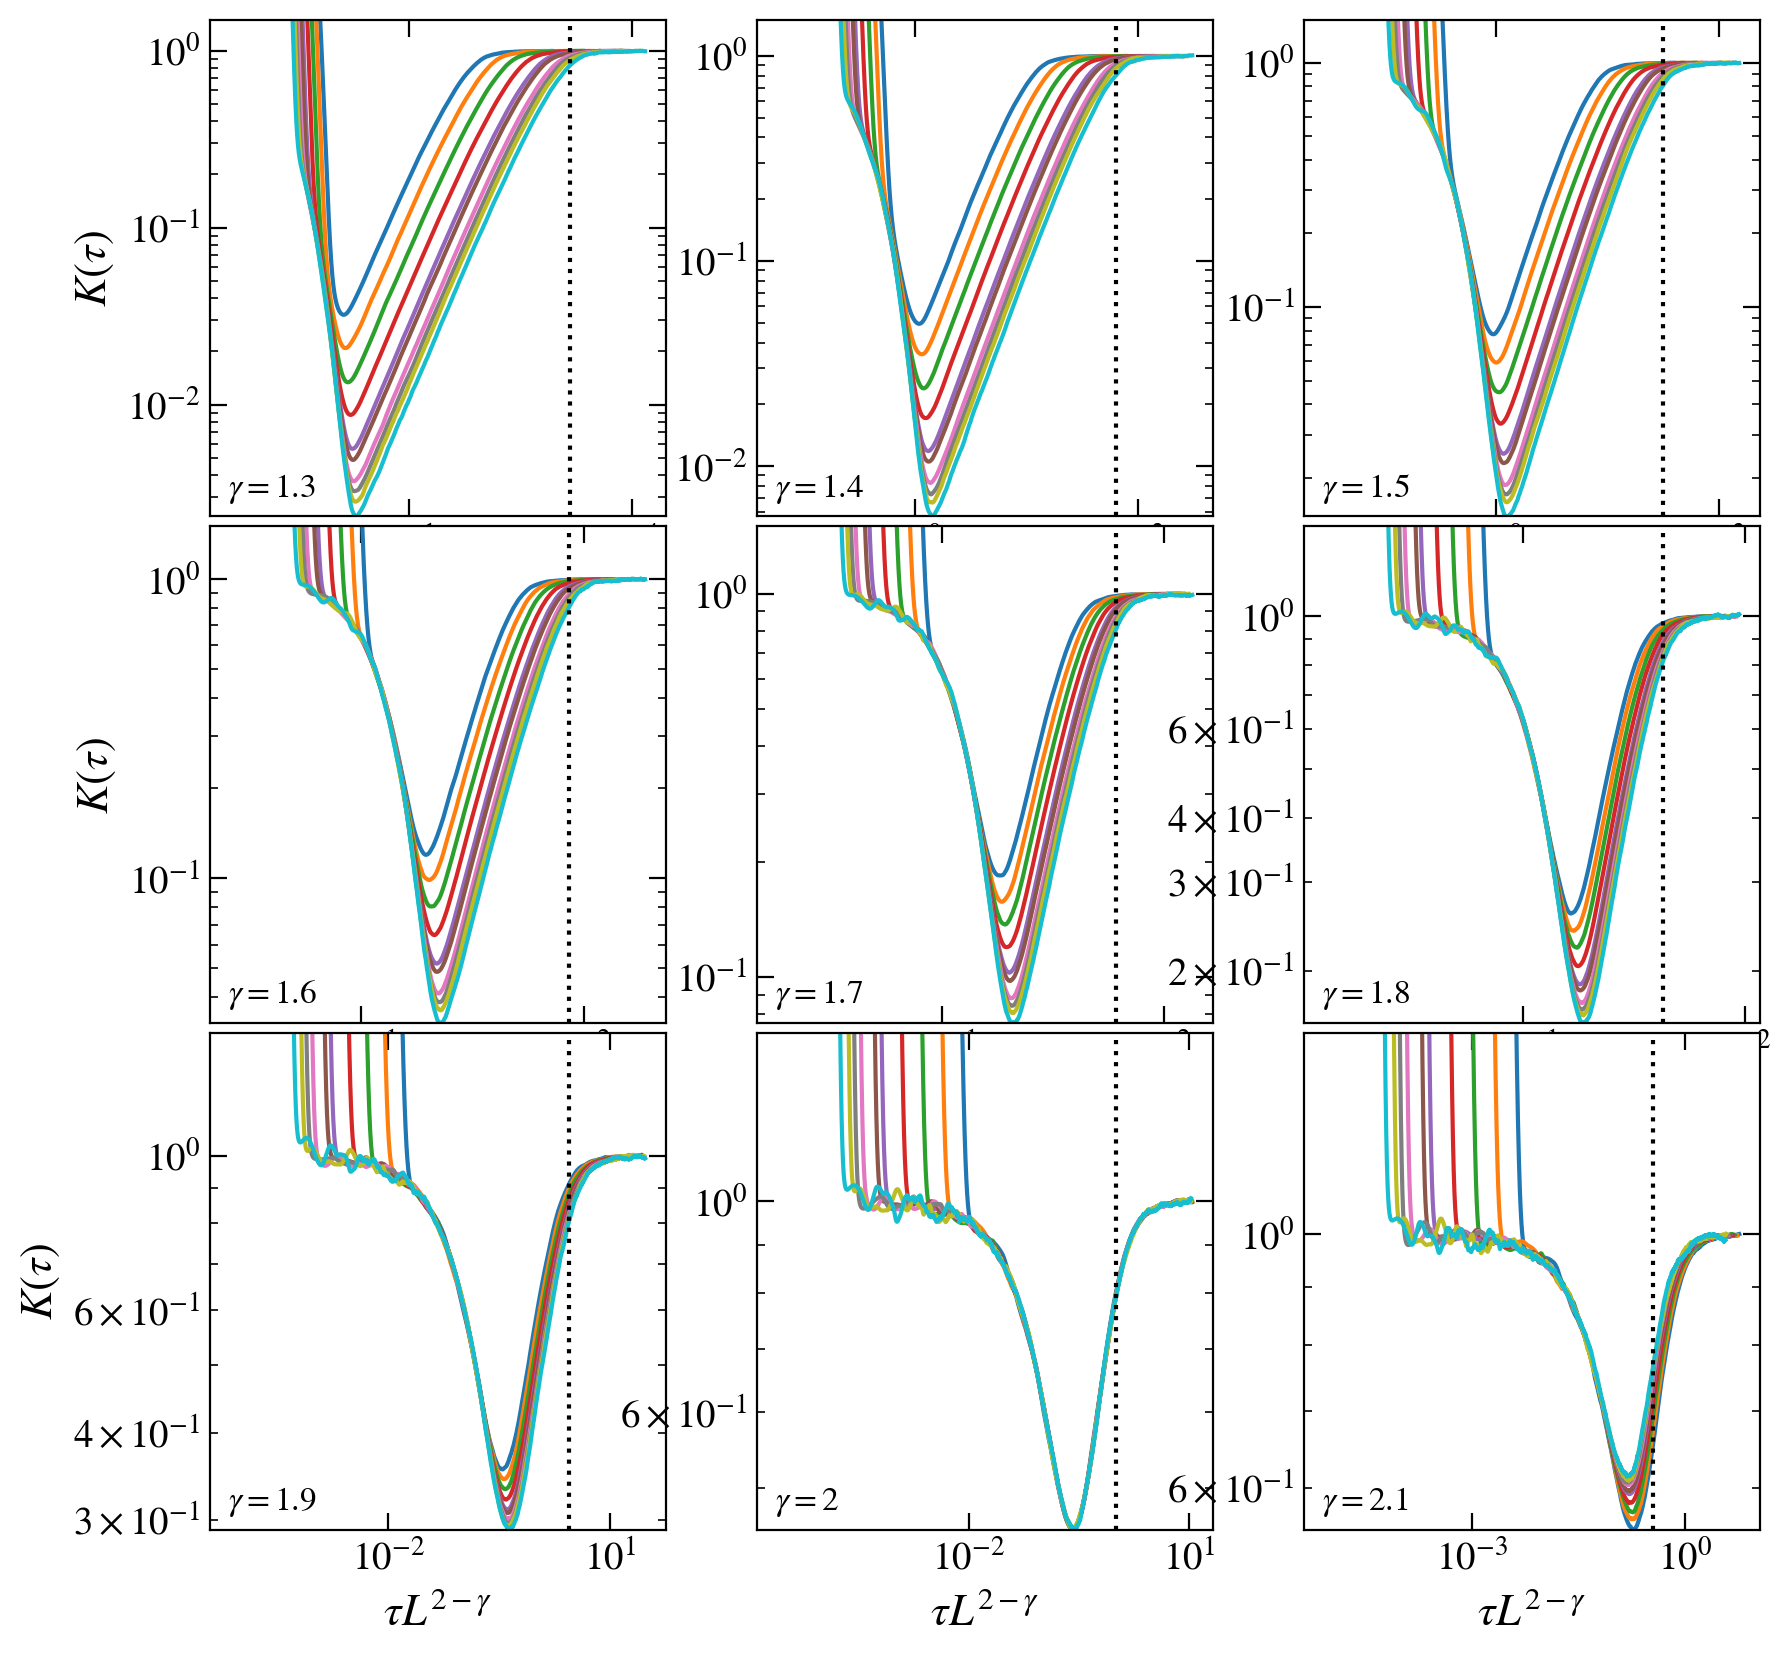

In [309]:

L=100
J=1
w=0.5

g=1.4
op=1
model = 'RP'
DIM=1
BC=0


prefix = base_dir(model=model, d=DIM, BC  = BC) + 'SpectralFormFactor/'

bucket = 100
folded = 1
running_mean = 1
eta=0.5

fig, axes = plt.subplots( nrows=3, ncols=3, figsize=(10,10), dpi = 200)
axes = axes.flatten()

for iii, g in enumerate( np.arange(1.3, 2.2, 0.1) ):
    axis = axes[iii]
    sizes = np.array([500, 1000, 2000, 4000, 8000, 10000, 16000, 20000, 24000, 32000])

    ymin = 10
    for L in sizes:
        name =  prefix + info(L=L, J=J, w=w, g=g, model =  model, ext=f'.hdf5')
        
        if exists(name):
            print("Found: ", name)
            with h5py.File(name, "r") as file:
                tHtyp = np.array(file.get('tH_typ'))[0]  / (2 * np.pi)
                times = np.array(file.get('times_fold')) / tHtyp if folded else np.array(file.get('times'))
                sff = np.array(file.get('sff_fold' if folded else "sff_eta=%.1f"%eta))
                try:
                    if sff.shape == (1, 10000) or sff.shape == (1, 5000):
                        sff = sff[0]
                        times = times[0]
                        # print(w, L, sff.shape)
                    if running_mean: 
                        sff = tools.remove_fluctuations(sff, bucket)
                        sff = sff[1000 : -bucket // 2]
                        times = times[1000 : -bucket // 2]
                        # f = splrep(times, sff, k=3, s=5)
                        # sff = splev(times, f)
                    plop = axis.plot(times * L**(2 - g), sff, label=r"$D=%d$"%(L))
                    
                    if min(sff) < ymin: ymin = min(sff)
                    # axis.axvline(x = 4/L, ls=':', color = plop[0].get_color())
                except TypeError:
                    print("Old file", name)
        else:
            print(name)
    # times = times * L**(2 - g) / 4
    # axis.plot(times, goe.spectral_form_factor(times), ls='--', c='k')

    fig_help.set_plot_elements(axis, ylabel=r"$K(\tau)$" if iii % 3 == 0 else "", xlabel=r"$\tau L^{2-\gamma}$" if iii > 5 else "", font_size=14, set_legend=False,
                                        xscale='log', yscale='log')
    # axis.set_xlim(1e-4, 2)
    axis.set_ylim(ymin, 1.5)
    axis.axvline(x=L**(2-g), ls=':', c='k')
    
    axis.annotate(r"$\gamma=%g$"%g, fontsize=12, xy=(0.04, 0.04), xycoords='axes fraction')

# fig_help.set_legend(axes[0], loc = 'lower right', fontsize=14, ncol=2)

fig.subplots_adjust(wspace = 0.2, hspace=0.02)
# plt.savefig("plots/Fig1.pdf", bbox_inches = 'tight', pad_inches=0.02)
# plt.savefig("plots/Fig1.png", bbox_inches = 'tight', pad_inches=0.02)

In [214]:
from datetime import datetime
from typing import List

def is_greater(index1, index2, values, increment_when_eq : bool):
    if values[index1]>values[index2]:
        return True
    elif values[index1]<values[index2]:
        return False
    else:
        # Case when: values[index1] == values[index2]
        index2_shifted = index2+1 if increment_when_eq else index2-1
        if index2_shifted < len(values):
            return is_greater(index1=index1, index2 = index2_shifted, values = values, increment_when_eq = increment_when_eq)
        else:
            return False
def find_local_max_min(values):
    mx = []
    mn = []

    n = len(values)
    if n==0:
        return None

    if(values[0] > values[1]):
        mx.append(0)
    elif(values[0] < values[1]):
        mn.append(0)
    
    for i in range(1, n-1):
        if (not is_greater(i, i-1, values, False) and not is_greater(i, i+1, values, True)):
            mn.append(i)
        elif(is_greater(i, i-1, values, False) and is_greater(i, i+1, values, True)):
            mx.append(i)

    if(values[-1] > values[-2]):
        mx.append(n-1)
    elif(values[-1] < values[-2]):
        mn.append(n-1)

    return {
        'local_max' : mx,
        'local_min' : mn
    }

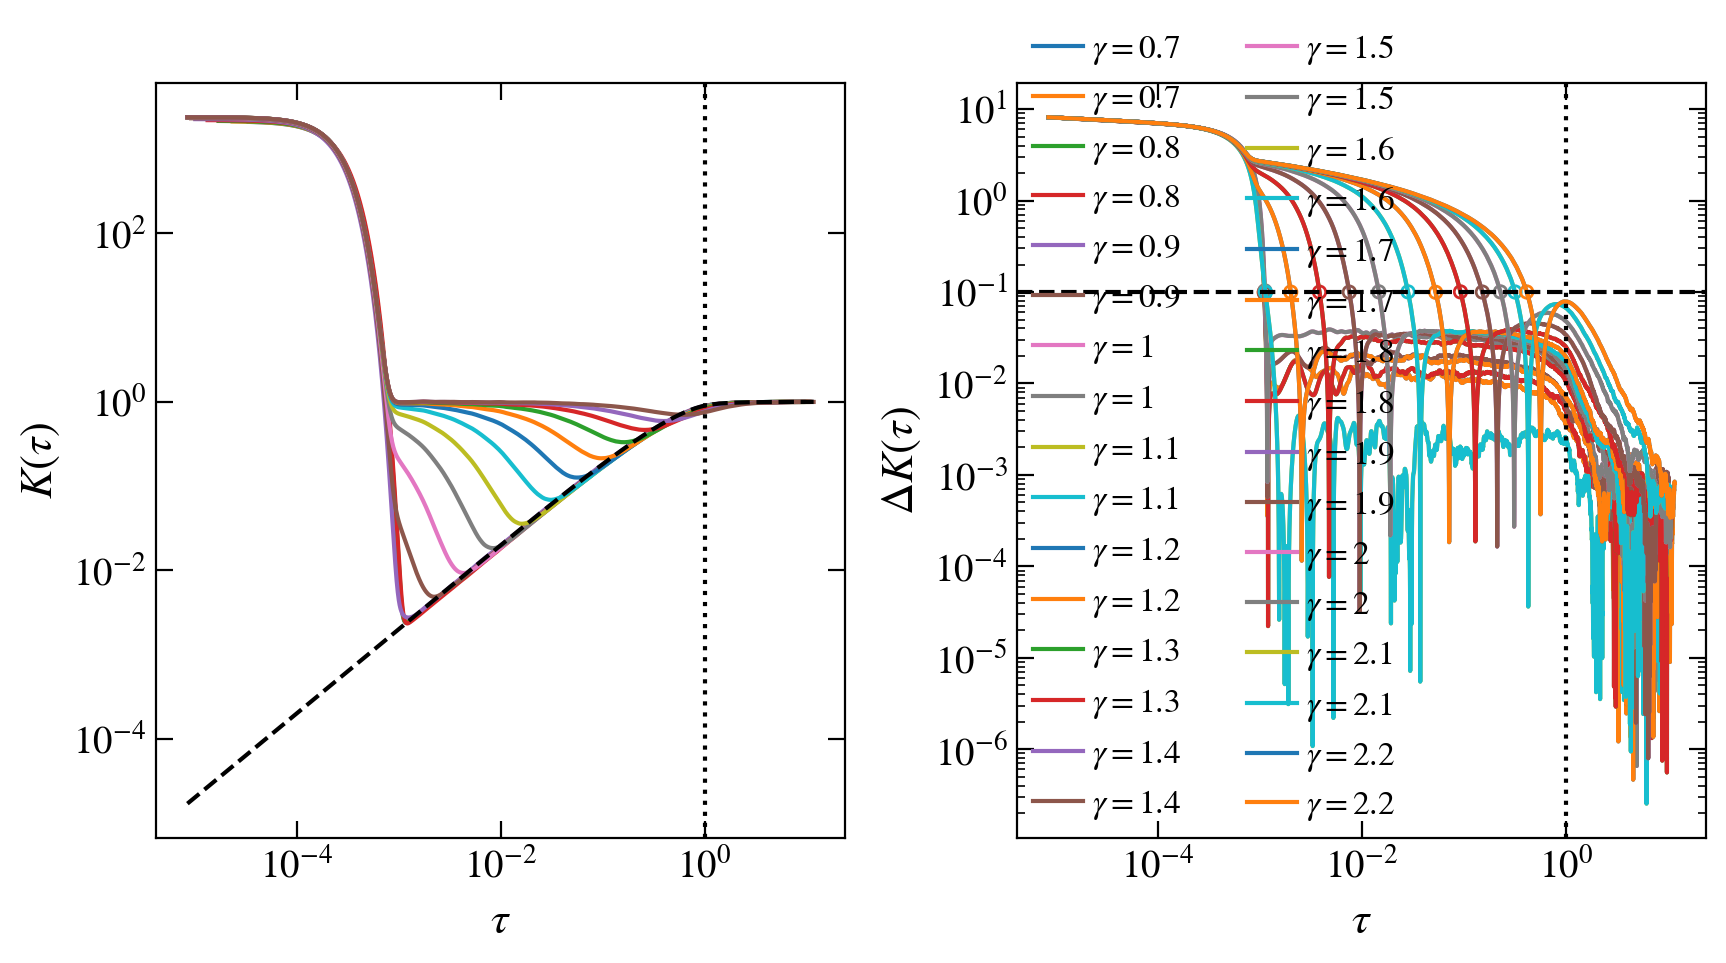

In [264]:

L=4000
J=1
w=0.5
g=1
op=1
model = 'RP'
DIM=1
BC=0


prefix = base_dir(model=model, d=DIM, BC  = BC) + 'SpectralFormFactor/'

bucket = 100
folded = 1
raw = 0

running_mean = 1
eta=0.3

epsilon=1e-1

sizes = np.array([500, 1000, 2000, 4000, 16000, 24000, 32000])
gamma_vals = np.linspace(0.7, 2.2, 16)
# w_vals = np.linspace(0.7, 0.82, 13)

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200, sharex=True)

for ii_a, g in enumerate(gamma_vals):
    name =  prefix + info(L=L, J=J, w=w, g=g, model =  model, ext=f'.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            tHtyp = np.array(file.get('tH_typ'))[0]
            chi = 1/6 + np.sqrt(3) / 4 / np.pi if g <= 1 else 1/2*erf(1/np.sqrt(2))
            tH = chi * L / np.sqrt(1 + (L+1) * L**(-g))
            times = np.array(file.get('times_fold')) / tH if folded else np.array(file.get('times'))
            sff = np.array(file.get("sff_fold2" if folded else "sff_eta=%.1f"%eta))
            if raw:
                tH = tH * 2 * np.pi
                sff = np.array(file.get("sff_raw"))
                times = np.array(file.get('times_fold')) / tH
            try:
                # print(sff.shape)
                if sff.shape == (1, 10000) or sff.shape == (1, 5000):
                    sff = sff[0]
                    times = times[0]
                if running_mean: 
                    sff = tools.remove_fluctuations(sff, bucket)
                    sff = sff[bucket // 2 : -bucket // 2]
                    times = times[bucket // 2 : -bucket // 2]
                    
                # times = times * L / 4
                axis[0].plot(times, sff)

                sff = np.abs( np.log10(sff / goe.spectral_form_factor(times)) )
                pl = axis[1].plot(times, sff, label=r"$\gamma=%g$"%g)
                
                # sff = ( np.abs(sff - goe.spectral_form_factor(times)) )
                
                idx = (np.abs(sff - epsilon)).argmin()
                # for ii in range(20, len(sff)):
                #     if sff[ii-3] - sff[ii-2] > 0 and sff[ii-2] - sff[ii-1]:
                #         if sff[ii] - sff[ii-1] > 0 and sff[ii+1] - sff[ii]:
                #             if sff[ii+3] - sff[ii+2] > 0 and sff[ii+2] - sff[ii+1]:
                #                 idx = ii
                #                 break;  
                
                
                pl = axis[1].plot(times, sff, label=r"$\gamma=%g$"%g)
                axis[1].scatter(times[idx], sff[idx], color=pl[0].get_color(), facecolor='None', s=20)
            except TypeError:
                print("Old file", name)
    else:
        print(name)
axis[0].plot(times, goe.spectral_form_factor(times), ls='--', c='k')
axis[1].axhline(y=epsilon, ls='--', c='k')

axis[0].axvline(x=1, ls=':', c='k')
axis[1].axvline(x=1, ls=':', c='k')
fig_help.set_plot_elements(axis[0], ylabel=r"$K(\tau)$", xlabel=r"$\tau$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_plot_elements(axis[1], ylabel=r"$\Delta K(\tau)$", xlabel=r"$\tau$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis[1], loc = 'lower left', fontsize=12, ncol=2)

# axis[0].set_ylim(1e-1, 10)
# axis[0].set_xlim(1e-1, 10)
# fig_help.set_plot_elements(axis[1], ylabel=r"$\left\langle\bar{S}_A^{\ell}\right\rangle$", xlabel=rescale_func_names[iabc], font_size=14, set_legend=False)


fig.subplots_adjust(wspace = 0.25, hspace=0.2)

## SAVING $t_{\rm Th}$

In [265]:

L=16000
J=1
w=0.5
g=1
op=1
model = 'RP'
DIM=1
BC=0


prefix = base_dir(model=model, d=DIM, BC  = BC) + 'SpectralFormFactor/'

bucket = 100
folded = 1
raw=0
running_mean = 1

eta=0.3
epsilon=0.1

gamma_vals = np.linspace(0.1, 4.0, 40)

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)

sizes = np.array([500, 1000, 2000, 4000, 8000, 10000, 16000, 20000, 24000, 32000])
# sizes = np.array([10000])
for L in sizes:
    t_Th   = np.zeros((gamma_vals.size))
    tH     = np.zeros((gamma_vals.size))
    tH_typ = np.zeros((gamma_vals.size))
    ratio  = np.zeros((gamma_vals.size))
    name_out = folder + f'_L={L}.hdf5'
    for ii_g, g in enumerate(gamma_vals):
        name =  prefix + info(L=L, J=J, w=w, g=g, model =  model, ext=f'.hdf5')
        
        if exists(name):
            with h5py.File(name, "r") as file:
                tH[ii_g]     = np.array(file.get('tH'))[0]
                tH_typ[ii_g] = np.array(file.get('tH_typ'))[0]
                ratio[ii_g]  = np.array(file.get('r_500'))[0]
                
                chi = 1/6 + np.sqrt(3) / 4 / np.pi if g <= 1 else 1/2*erf(1/np.sqrt(2))
                tH_analytical = chi * L / np.sqrt(1 + (L+1) * L**(-g))# * 2 * np.pi
                times = np.array(file.get('times_fold')) / tH_analytical if folded else np.array(file.get('times'))
                sff = np.array(file.get("sff_fold2" if folded else "sff_eta=%.1f"%eta))
                if raw:
                    tH_analytical = tH_analytical * 2 * np.pi
                    sff = np.array(file.get("sff_raw"))
                    times = np.array(file.get('times_fold')) / tH_analytical
                try:
                    if sff.shape == (1, 10000) or sff.shape == (1, 5000):
                        sff = sff[0]
                        times = times[0]
                    sff = tools.remove_fluctuations(sff, bucket)
                    sff = sff[bucket // 2 : -bucket // 2]
                    times = times[bucket // 2 : -bucket // 2]
                    
                    sff = np.abs( np.log10(sff / goe.spectral_form_factor(times)) )
                    idx = (np.abs(sff - epsilon)).argmin()
                    # sff = ( (sff - goe.spectral_form_factor(times)) )
                    # idx = (np.abs(sff)).argmin()
                    
                    
                    t_Th[ii_g] = times[idx]
                except TypeError:
                    t_Th[ii_g] = np.nan
                    print("Old file", name)
        else:
            # t_Th[ii_alfa] = t_Th[ii_alfa-1]
            # tH[ii_alfa] = tH[ii_alfa-1]
            # tH_typ[ii_alfa] = tH_typ[ii_alfa-1]
            print(name)
    hf = h5py.File(name_out, 'w')
    hf.create_dataset('interaction',             gamma_vals.shape, data = gamma_vals)
    hf.create_dataset('thouless time',           t_Th.shape,       data = t_Th)
    hf.create_dataset('heisenberg time',         tH.shape,         data = tH)
    hf.create_dataset('typical heisenberg time', tH_typ.shape,     data = tH_typ)
    hf.create_dataset('gap ratio',               ratio.shape,      data = ratio)
    hf.close()


../results/RP/SpectralFormFactor/_L=32000,J=1,g=2.6.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=2.7.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=2.8.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=2.9.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.1.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.2.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.3.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.4.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.5.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.6.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.7.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.8.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=3.9.hdf5
../results/RP/SpectralFormFactor/_L=32000,J=1,g=4.hdf5


(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)
(40,)


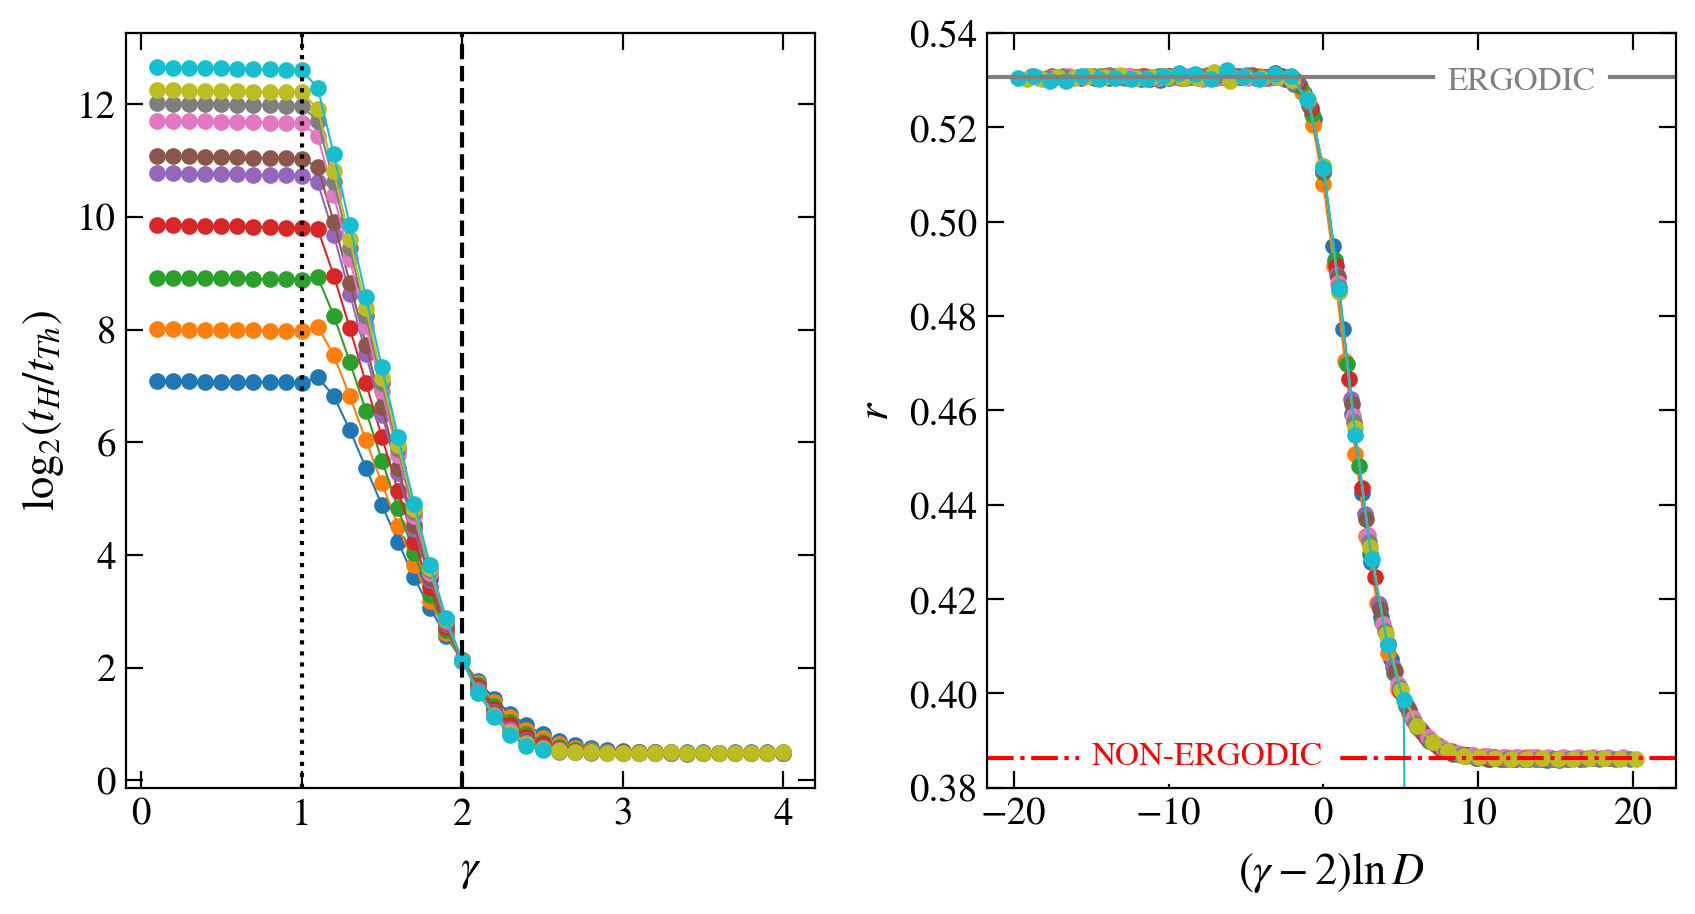

In [266]:

L=16000
J=1
w=0.5
g=1
op=1
model = 'RP'
DIM=1
BC=0

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)

sizes = np.array([500, 1000, 2000, 4000, 8000, 10000, 16000, 20000, 24000, 32000])

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200)

heisenberg_time = []
thouless_time = []
disorder = []
for L in sizes:
    lab = r"$D=%g$"%(L)
    t_Th    = None
    tH      = None
    tH_typ  = None
    name_out = folder + f'_L={L}.hdf5'
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            alfa_vals  = np.array(file.get('interaction'))
            tH         = np.array(file.get('heisenberg time'))
            tH_typ     = np.array(file.get('typical heisenberg time'))
            t_Th       = np.array(file.get('thouless time'))
            ratio      = np.array(file.get('gap ratio'))
            print(ratio.shape)
    else:
        print(name_out)
    
    thouless_time.append(tH_typ * t_Th)
    disorder.append(alfa_vals)
    heisenberg_time.append(tH_typ)

    axis[1].plot( (alfa_vals - 2)*np.log(L), ratio, marker='o', markersize=5, label=lab, lw=0.75)
    
thouless_time = np.array(thouless_time)
heisenberg_time = np.array(heisenberg_time)



alfa_dense = alfa_vals#np.linspace(alfa_vals[0], alfa_vals[-1], alfa_vals.size + (alfa_vals.size-1) * 4)
for ii_L, L in enumerate(sizes):
    lab = r"$D=%g$"%(L)
    t_Th = np.log2( heisenberg_time[ii_L] / thouless_time[ii_L] )
    # f = splrep(alfa_vals, t_Th, k=5, s=10)
    # t_Th = splev(alfa_dense, f)
    axis[0].plot(alfa_dense, t_Th, marker='o', markersize=5, label=lab, lw=0.75)

axis[0].axvline(x=2, ls='--', c='k')
axis[0].axvline(x=1, ls=':', c='k')

axis[1].axhline(y=0.5307, ls='-',  c='gray')
axis[1].axhline(y=0.3863, ls='-.', c='red')

axis[1].annotate(r"ERGODIC", color='gray', fontsize=12, xy=(8, 0.528), xycoords='data', backgroundcolor="w")
axis[1].annotate(r"NON-ERGODIC", color='red', fontsize=12, xy=(-15, 0.385), xycoords='data', backgroundcolor="w")
# axis.plot(sizes, heisenberg_time[-1], color='k', ls='-.')
fig_help.set_plot_elements(axis[0], ylabel=r"$\log_2(t_H/t_{Th})$", xlabel=r"$\gamma$",
                            font_size=14, set_legend=False, xscale='linear', yscale='linear')#), ylim=(3e1, 3e5))
fig_help.set_plot_elements(axis[1], ylabel=r"$r$", xlabel=r"$(\gamma-2)\ln{D}$",
                            font_size=14, set_legend=False, xscale='linear', yscale='linear', ylim=(0.38, 0.54))

fig.subplots_adjust(wspace = 0.25, hspace=0.05)
# plt.savefig("plots/Fig2.pdf", bbox_inches = 'tight', pad_inches=0.02)
# plt.savefig("plots/Fig2.png", bbox_inches = 'tight', pad_inches=0.02)

## BETA FUNCTION

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5]
g_crit =  2.1217823191307117
	gamma=  0.1 	A=  -1.26906924 	 log_2{b}=  -1.6772580023443366 	xi=  1.07570722 -2.2222222222222223
	gamma=  0.2 	A=  -1.26442512 	 log_2{b}=  -1.5268322674841086 	xi=  1.07653012 -2.5
	gamma=  0.3 	A=  -1.25970681 	 log_2{b}=  -1.3764807226238802 	xi=  1.07732219 -2.857142857142857
	gamma=  0.4 	A=  -1.26890271 	 log_2{b}=  -1.2122149677636525 	xi=  1.07686318 -3.3333333333333335
	gamma=  0.5 	A=  -1.26333976 	 log_2{b}=  -1.062708062903424 	xi=  1.07781208 -4.0
	gamma=  0.6 	A=  -1.25965367 	 log_2{b}=  -0.9113242980431955 	xi=  1.078495 -5.0
	gamma=  0.7 	A=  -1.26303058 	 log_2{b}=  -0.7528775331829676 	xi=  1.07863625 -6.666666666666666
	gamma=  0.8 	A=  -1.27399683 	 log_2{b}=  -0.5868414283227394 	xi=  1.07818888 -9.999999999999996
	gamma=  0.9 	A=  -1.27104983 	 log_2{b}=  -0.4347185734625112 	xi=  1.07895546 -19.999999999999982
	gamma=  1.0 	A=  -

Text(0.04, 0.94, '(b)')

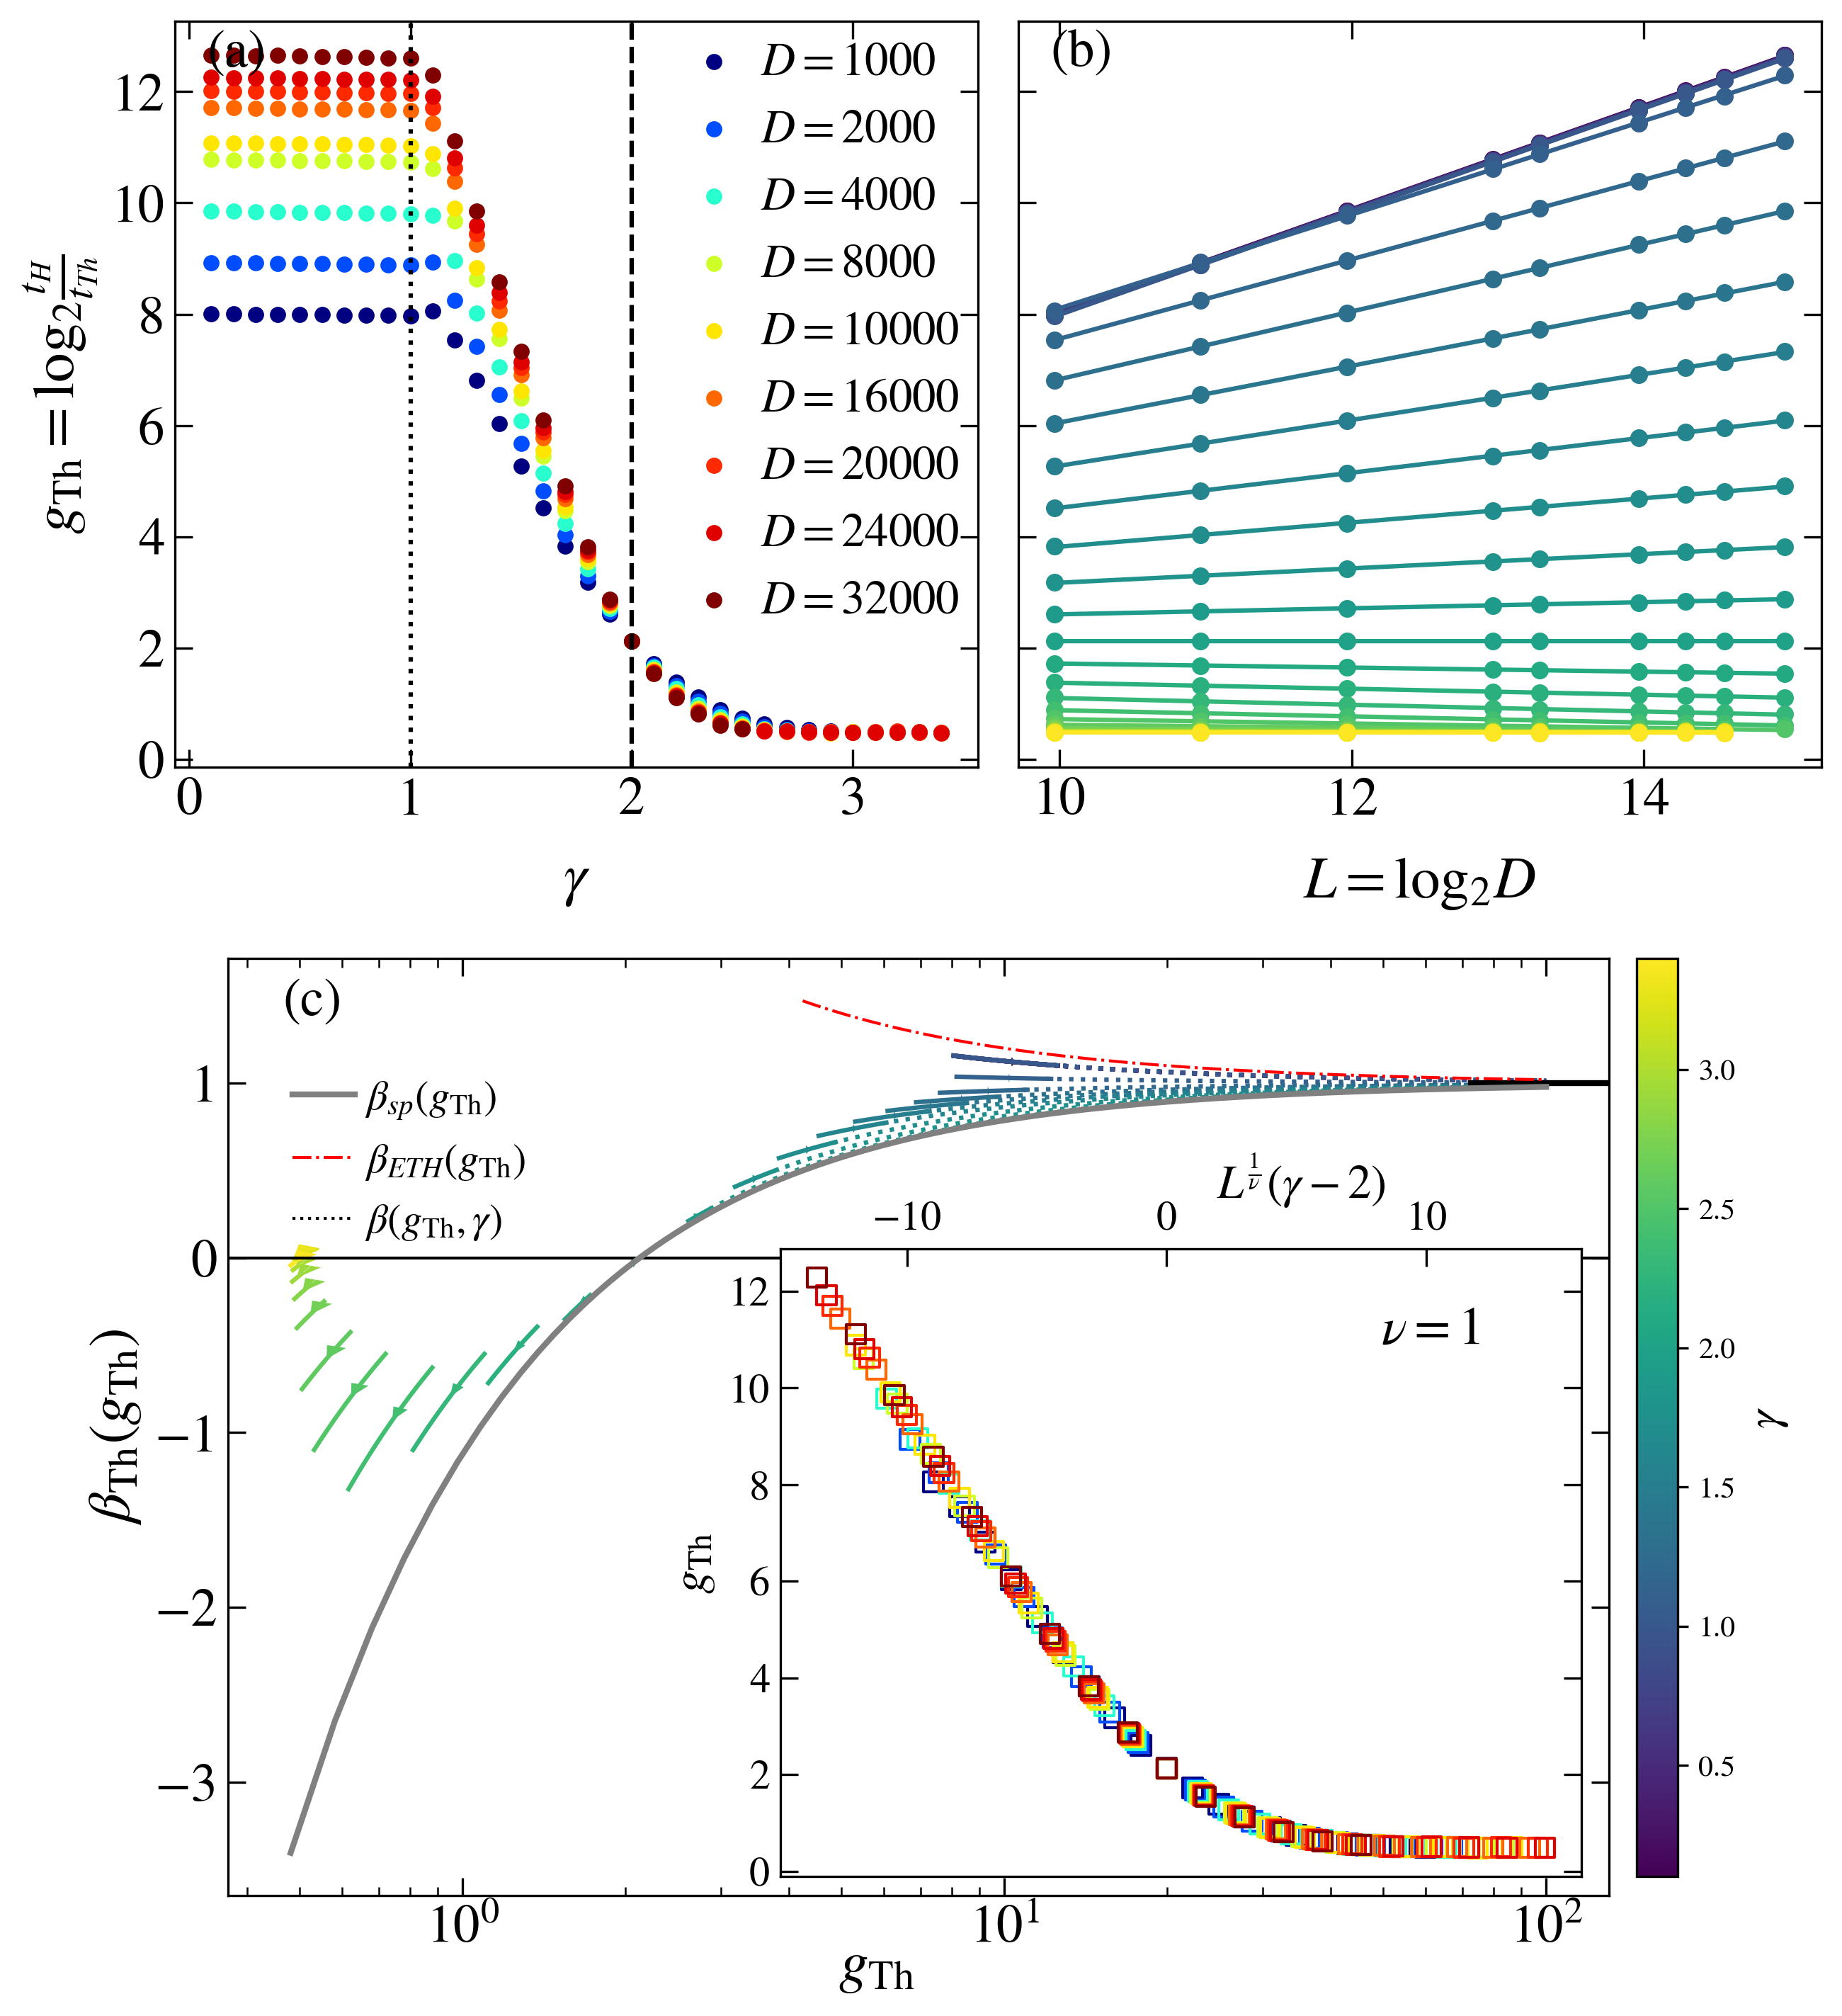

In [32]:
L=16000
J=1
w=0.5
g=1
op=1
model = 'RP'
DIM=1
BC=0

gamma_vals = np.linspace(0.1, 2.5, 25)
print(gamma_vals)

g_crit = 2
gth_crit = 2.1217823191307117
nu = 1

fig = plt.figure(figsize=(10,9), dpi = 300)
gs1 = GridSpec(1, 1)
gs1.update(top=0.51, bottom=0.02, left=0.15, right=0.8)
axis = fig.add_subplot(gs1[0,0])

gs2 = GridSpec(1, 2)
gs2.update(top=1, bottom=0.61, wspace=0.05, hspace=0.25)
ax1 = fig.add_subplot(gs2[0])
ax2 = fig.add_subplot(gs2[1])
axis = [axis, ax1, ax2]

inset = axis[0].inset_axes([0.4, 0.02, 0.58, 0.67])
# inset = axis[2]

use_collapse = 0
use_input_crit_point = 0
use_two_parameter_ansatz = 0

interpolate = 0
use_fit = 1

delta=1
bin_size = 5


gmax = 100

def th_fit(D, xi, A):
    # return A * g / xi
    return D / xi + A

def th_fit2(D, xi, A):
    return -D / xi + A    
    # return -g / xi + A

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

g_min = 0.1
g_max = 3.5

sizes = np.array([1000, 2000, 4000, 8000, 10000, 16000, 20000, 24000, 32000])
ln_sizes = np.log2(sizes)

heisenberg_time = []
thouless_time = []
disorder = []
for L in sizes:
    t_Th    = None
    tH      = None
    tH_typ  = None
    name_out = folder + f'_L={L}.hdf5'
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            gamma_vals  = np.array(file.get('interaction'))
            tH         = np.array(file.get('heisenberg time'))
            tH_typ     = np.array(file.get('typical heisenberg time'))
            t_Th       = np.array(file.get('thouless time'))
    else:
        print(name_out)
    
    indices = np.where(np.logical_and(gamma_vals >= g_min, gamma_vals < g_max))[0]
    gamma_vals = gamma_vals[indices]
    thouless_time.append( (tH * t_Th)[indices] )
    disorder.append(gamma_vals)
    heisenberg_time.append(tH[indices])

thouless_time = np.array(thouless_time)
heisenberg_time = np.array(heisenberg_time)
ydata = np.log2(heisenberg_time / thouless_time)

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(
    vmin=np.min(gamma_vals),
    vmax=np.max(gamma_vals) )


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

norm = matplotlib.colors.Normalize(
    vmin=np.min(ln_sizes),
    vmax=np.max(ln_sizes))


# create a ScalarMappable and initialize a data structure
s_m_L = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m_L.set_array([])


data_labs = []
xx_data = []
yy_data = []

for ii_L, lnL in enumerate(ln_sizes):
    
    axis[1].scatter(gamma_vals, ydata[ii_L], marker='o', s=20,      color = s_m_L.to_rgba(lnL), label=r"$D=%d$"%sizes[ii_L])
    
    
    indices = np.where(np.logical_and(gamma_vals > np.round(2 - delta, 3), gamma_vals <= np.round(2 + delta, 3)))[0]
    # indices = np.where( alfa_dense <= np.round(alfa_crit, 3) )[0]
    
    gams = gamma_vals[indices]
    ydats = ydata[ii_L][indices]
    xx_data.append(gams[~np.isnan(ydats)])
    yy_data.append(ydats[~np.isnan(ydats)])
    
const = 0
omega = 0
if use_collapse:
    crit_exponents = []
    crit_alfas = []
    crit_omega = []
    crit_const = []
    for seed in [5324]:
        if use_two_parameter_ansatz:
            crit_exp, omega, const, crit_pars, costfun, status = cost.get_crit_points(x=np.array(xx_data), y=np.array(yy_data), vals=ln_sizes, crit_fun='const', scaling_ansatz='classic', seed=seed, two_parameter_ansatz=True, use_input_criticals=use_input_crit_point, _crit_in=[g_crit])
            crit_exponents.append(crit_exp)
            crit_omega.append(omega)
            crit_const.append(const)
            crit_alfas.append(crit_pars[0])
        else:
            crit_exp, crit_pars, costfun, status = cost.get_crit_points(x=np.array(xx_data), y=np.array(yy_data), vals=ln_sizes, crit_fun='const', scaling_ansatz='classic', seed=seed, two_parameter_ansatz=False, use_input_criticals=use_input_crit_point, _crit_in=[g_crit])
            crit_exponents.append(crit_exp)
            crit_alfas.append(crit_pars)

    print("----------------------------g0 = ", J)
    print("nu = ", 1/np.array(crit_exponents))
    print("gamma_c = ", crit_alfas)
    print("omega = ", crit_omega)
    print("const = ", crit_const)

    if use_two_parameter_ansatz:
        omega = tools.typical(crit_omega)
        const = tools.typical(crit_const)
    crit_exp = np.mean(crit_exponents)
    crit_pars = [np.mean(crits) for crits in np.transpose(crit_alfas)]

    crit_exp = 1/crit_exp
    print("Cost fun = ", costfun, "mu = ", crit_exp, "omega = ", omega, "const = ", const)
else:
    crit_exp = nu
    crit_pars = [g_crit]

gth_crit = 1e6
for ii_L, lnL in enumerate(ln_sizes):
    xdats = (lnL)**(1/crit_exp) * (xx_data[ii_L] - crit_pars[0])
    ydats = yy_data[ii_L] - const * (lnL)**(-omega)
    inset.scatter( xdats, ydats, marker='s', s=50 - lnL / 2, color = s_m_L.to_rgba(lnL), facecolor='None')
    idx = np.argmin(np.abs(xdats))
    if ydats[idx] < gth_crit: gth_crit = ydats[idx]

# gs = np.linspace(g_crit - 0.2, g_crit + 0.2)
# axis[0].plot(gs, (gs - g_crit) / (crit_exp * g_crit), ls='-', color='gray', lw=2)
print("g_crit = ", gth_crit)

axis[1].axvline(x=1, ls=':', c='k')
axis[1].axvline(x=2, ls='--', c='k')
# axis[2].axvline(x=1/np.sqrt(2),       ls=':', c='k')
# axis.plot(sizes, heisenberg_time[-1], color='k', ls='-.')
fig_help.set_plot_elements(axis[1], ylabel=r"$g_{\rm Th}=\log_2\frac{t_H}{t_{Th}}$", xlabel=r"$\gamma$", font_size=18, set_legend=False, xscale='linear', yscale='linear')
fig_help.set_legend(axis[1], fontsize=16, loc='upper right', anchor=(1.03, 1.03))


ydata = np.transpose( np.array(ydata) )

idx_c = 0


envelope_ydata = []
envelope_xdata = []
yax_max = -10
yax_min = 10
for ii_g, g in enumerate(gamma_vals):
    col = s_m.to_rgba(g)
    # col = s_m.to_rgba(alfa)
    yy = ydata[ii_g]
    xx = np.log2(sizes)[~np.isnan(yy)]
    yy = yy[~np.isnan(yy)]
    
        
    axis[2].plot(xx, yy, marker='o', markersize=5, lw=0.0, ls='--', color=s_m.to_rgba(g))
    
    my_fit = th_fit if g <= 2 else th_fit2
    try:
        # xx = xx - N
        pars, pconv, fit_info, msg, _ = fit(my_fit,
                        xdata = xx,
                        ydata = yy,
                        full_output=True, maxfev=10000)
        # print(J, alfa, fit_info['fvec'])
        dense_sizes = np.linspace(xx[0], xx[-1], 10000)
        axis[2].plot(dense_sizes, my_fit(dense_sizes, *pars), lw=1.5, color=s_m.to_rgba(g), ls = '-')
        xi = np.round(pars[0], 8)
        A  = np.round(pars[1], 8)
        chi = (1/2 * erf(1/np.sqrt(2)))
        print("\tgamma= ", np.round(g, 2), "\tA= ", A, "\t log_2{b}= ", ( (2-g) * np.log2(chi) - A) , "\txi= ", xi, 2/(g - 1))
        if g < 2 - 0.02:
            dense_g = np.linspace(yy[-2], gmax, 10000)
            axis[0].plot(dense_g, 1 - (A) / dense_g, lw=1.5, color=s_m.to_rgba(g), ls = ':')
            
            # axis[0].plot(dense_g, 1 - ((2-g) * np.log2(chi) + g_crit) / dense_g, lw=1.5, color=s_m.to_rgba(g), ls = ':')
    except RuntimeError:
        print(g, "Failed")
    
    fig_help.set_plot_elements(axis[2], ylabel="", xlabel=r"$L=\log_2{D}$", font_size=18, set_legend=False, xscale='linear', yscale='linear')

    if interpolate:
        f = splrep(xx, yy, k=3, s=0)
        xx = np.linspace(xx[0], xx[-1], xx.size + (xx.size-1) * 2)
        yy = splev(xx, f)
        
    if not use_fit:
        beta = diff_central( np.log(xx), np.log(yy))# * xx[1:-1] / yy[1:-1]
        xx_beta = yy[1:-1]
    
        line, = axis[0].plot(xx_beta, beta, marker='o', markersize=0 if interpolate else 2, lw=1.5, color=col)
        
        envelope_ydata = [*envelope_ydata, *beta]
        envelope_xdata = [*envelope_xdata, *xx_beta]
        # envelope_ydata = [*envelope_ydata, (beta[-1])]
        # envelope_xdata = [*envelope_xdata, (xx_beta[-1])]
        
        if min(beta) < yax_min: yax_min = min(beta)
        if max(beta) > yax_max: yax_max = max(beta)
        
        i1 = 1
        dx = xx_beta[i1+1] - xx_beta[i1]
        dy = beta[i1+1] - beta[i1]
        pos_x = xx_beta[i1] + dx/2
        pos_y = beta[i1] + dy/2
        
        axis[0].arrow(pos_x, pos_y, 0.01 * dx, 0.01 * dy, shape='full', lw=0, length_includes_head=True, head_width=.05, color=col)
        # axis[0].quiver(pos_x, pos_y, u/arr_norm, v/arr_norm, angles="xy", zorder=5, pivot="mid", color=col, linewidth=0, width=0.005, headwidth=3, lw=0)
        # axis[0].quiver(pos_x, pos_y, u/arr_norm, v/arr_norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0)
    else:
        dense_sizes = np.linspace(xx[0], xx[-1], 50)
        # f = splrep(xx, yy, k=5 if alfa < alfa_crit + 0.08 else 5, s=10)
        # smooth_data = splev(dense_sizes, f)
        # deriv = splev(dense_sizes, f, der=1) * dense_sizes / smooth_data
        smooth_data = my_fit(dense_sizes, *pars)
        deriv = diff_central(np.log(dense_sizes), np.log(smooth_data))
        smooth_data = smooth_data[1:-1]
        axis[0].plot(smooth_data, deriv, lw=1.5, color=col)
        
        if min(deriv) < yax_min: yax_min = min(deriv)
        if max(deriv) > yax_max: yax_max = max(deriv)
        # spline = InterpolateSpline(sizes, ydata[ii_a], k=5, s=0)
        # spl_deriv = spline.derivative(n=1)
        # aaaa = np.linspace(sizes[0], sizes[-1], 100)
        # smooth_data = spline(aaaa)
        # deriv = spl_deriv(aaaa)
        
        envelope_ydata = [*envelope_ydata, *deriv]
        envelope_xdata = [*envelope_xdata, *smooth_data]
        # envelope_ydata = [*envelope_ydata, deriv[-1]]
        # envelope_xdata = [*envelope_xdata, smooth_data[-1]]

        i1 = smooth_data.size // 2
        dx = smooth_data[i1+1] - smooth_data[i1]
        dy = deriv[i1+1] - deriv[i1]
        pos_x = smooth_data[i1] + dx/2
        pos_y = deriv[i1] + dy/2
        axis[0].arrow(pos_x, pos_y, 0.01 * dx, 0.01 * dy, shape='full', lw=0, length_includes_head=True, head_width=.05, color=col)
        # axis[0].quiver(pos_x, pos_y, u/arr_norm, v/arr_norm, angles="xy", zorder=5, pivot="mid", color=col, linewidth=0, width=0.006, headwidth=2)
        
# # sorting X and Y data according to increasing X
permut = np.argsort( np.array(envelope_xdata) )
envelope_ydata = np.array(envelope_ydata)[permut]
envelope_xdata = np.array(envelope_xdata)[permut]

size = len(envelope_xdata)
envelope = np.zeros( (size // bin_size) )
xxx = np.zeros( (size // bin_size) )

# Finding maximum Y in each bin of 20 points of interpolated data
for k in range(envelope.size):
    idx_r = (k+1) * bin_size if k < envelope.size-1 else -1
    idx = np.argmax(envelope_ydata[k * bin_size : idx_r])
    envelope[k] = envelope_ydata[k * bin_size : idx_r][idx]
    xxx[k]      = envelope_xdata[k * bin_size : idx_r][idx]
# xxx = envelope_xdata
# envelope = envelope_ydata
# axis[0].scatter(xxx, envelope, s=30, color='k')

axis[0].axhline(y=0, ls='-', c='k', lw=1)
axis[0].axhline(y=1, ls='-', c='black', lw=2, xmin = 0.9)
# inset.axvline(x=0, ls='--', c='k', lw=1)

# gs = np.linspace(g_crit - 0.75, g_crit + 0.75, 1000)
# axis[0].plot(gs, (gs - g_crit) / g_crit, ls='--', color='k')

gs = np.linspace(min(envelope_xdata), gmax, 1000)
axis[0].plot(gs, 1 - gth_crit / gs, lw=2, ls='-', color='gray', label=r"$\beta_{sp}(g_{\rm Th})$")

gs = np.linspace(2 * gth_crit, gmax, 1000)
axis[0].plot(gs, 1 + 2 / gs, lw=1, ls='-.', color='r', label=r"$\beta_{ETH}(g_{\rm Th})$")


axis[0].plot(np.nan, np.nan, lw=1, ls=':', color='k', label=r"$\beta(g_{\rm Th},\gamma)$")

xlab = r"$g_{\rm Th}$"
ylab = r"${\beta}_{\rm Th}(g_{\rm Th})$"
fig_help.set_plot_elements(axis[0], xlabel=xlab, ylabel=ylab, font_size=18, set_legend=False, xscale='log')
fig_help.set_legend(axis[0], loc = 'upper left', fontsize=14, anchor=(0.02, 0.91))

fig_help.set_plot_elements(inset, xlabel=r"$L^\frac{1}{\nu}(\gamma-2)$", ylabel=r"$g_{\rm Th}$", font_size=14, set_legend=False)

inset.xaxis.set_label_position("top")
inset.xaxis.set_label_coords(.65, 1.08)
inset.xaxis.tick_top()
# inset.set_xticks([-10, 0, 5])
inset.annotate(r"$\nu=1$", fontsize=18, xy=(0.75, 0.85), xycoords='axes fraction')

axis[0].xaxis.set_label_coords(.47, -0.05)

# ax1.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
# ax1.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
ax2.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: ""))
ax2.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: ""))
# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
# # fig.colorbar(im, cax=cbar_ax)

# fig.subplots_adjust(wspace = 0.02, hspace=0.2)

# cbaxes = inset_axes(axis[0], width="70%", height="5%", loc=4)
cbaxes = axis[0].inset_axes([1.02, 0.02, 0.03, 0.98])
cbar = fig.colorbar(s_m, cax = cbaxes, orientation='vertical')

cbar.set_label(r"$\gamma$", fontsize=16)
# cbar.ax.tick_params(labelsize=15)

axis[0].annotate(r"(c)", fontsize=18, xy=(0.04, 0.94), xycoords='axes fraction')
axis[1].annotate(r"(a)", fontsize=18, xy=(0.04, 0.94), xycoords='axes fraction')
axis[2].annotate(r"(b)", fontsize=18, xy=(0.04, 0.94), xycoords='axes fraction')
# inset.annotate(r"$\mu\approx%.2f$"%(crit_exp) + f"\n" + r"$\tilde{\alpha}_c\approx%.2f$"%(crit_pars[0]), fontsize=18, xy=(0.1, 0.7), xycoords='axes fraction')

# fig.savefig("plots_beta/FigS4.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig.savefig("plots_beta/FigS4.png", bbox_inches = 'tight', pad_inches=0.02)




[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5]


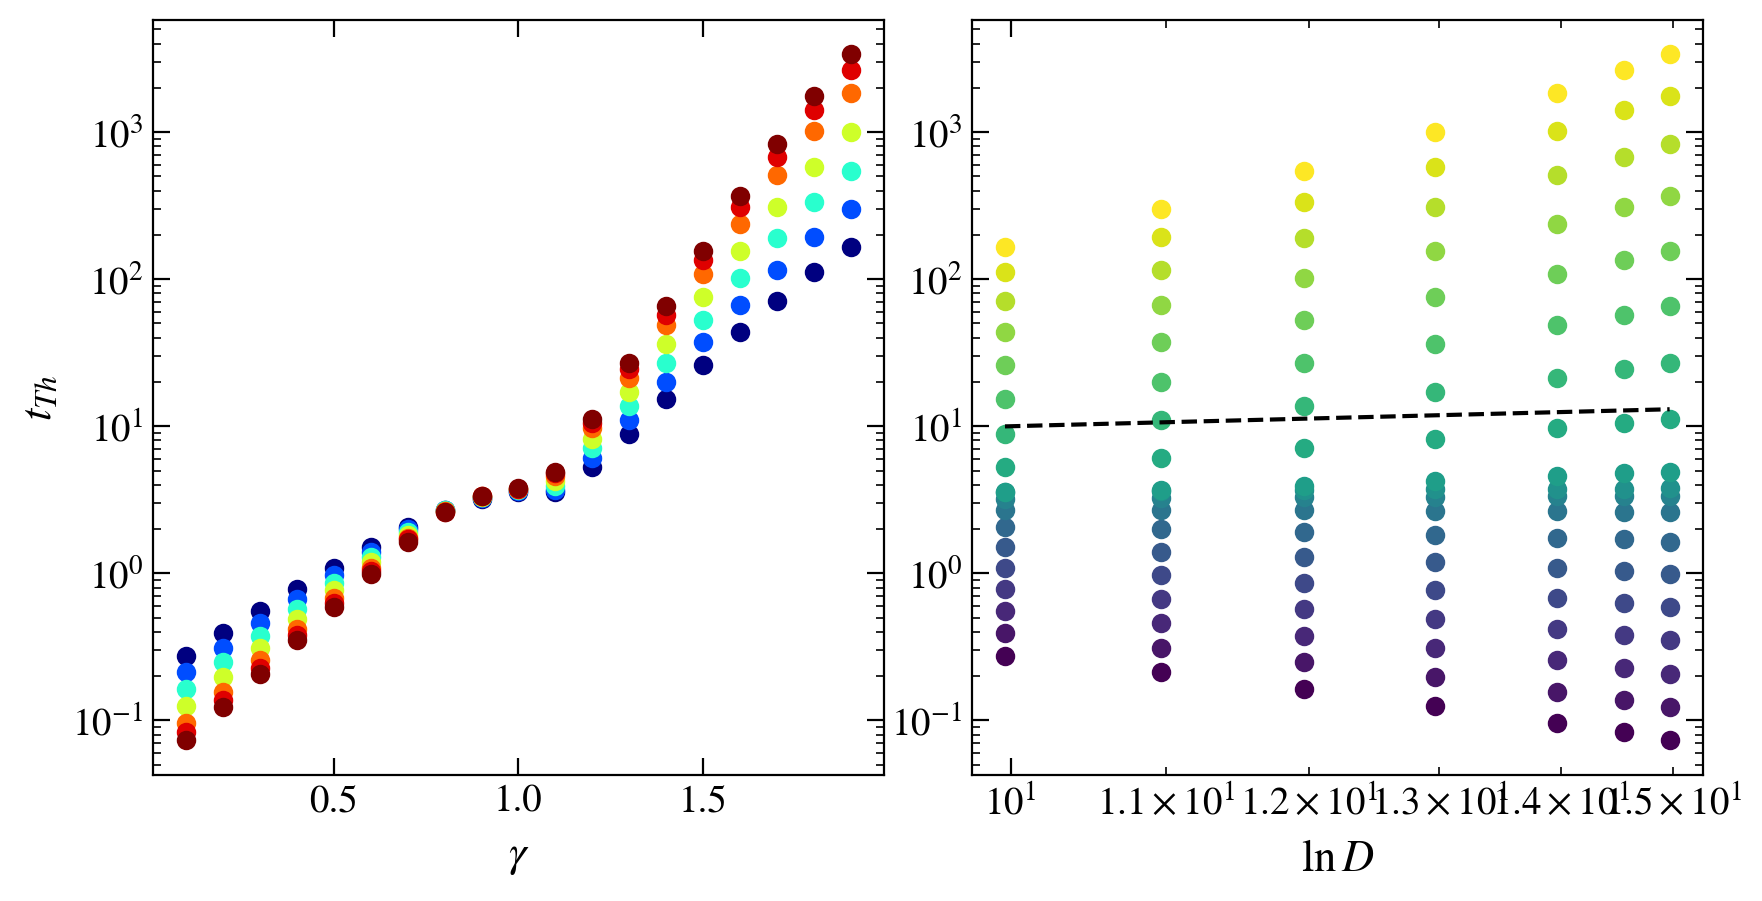

In [248]:
L=16000
J=1
w=0.5
g=1
op=1
model = 'RP'
DIM=1
BC=0

gamma_vals = np.linspace(0.1, 2.5, 25)
print(gamma_vals)

g_crit = 2
nu = 1

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200)

use_collapse = 0
use_input_crit_point = 0
use_two_parameter_ansatz = 0

interpolate = 0
use_fit = 1

delta=1
bin_size = 5


gmax = 100

def th_fit(D, xi, A):
    # return A * g / xi
    return D / xi + A

def th_fit2(D, xi, A):
    return -D / xi + A    
    # return -g / xi + A

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

g_min = 0.1
g_max = 2.


sizes = np.array([1000, 2000, 4000, 8000, 16000, 24000, 32000])
ln_sizes = np.log2(sizes)

norm = matplotlib.colors.Normalize(
    vmin=np.min(ln_sizes),
    vmax=np.max(ln_sizes))


# create a ScalarMappable and initialize a data structure
s_m_L = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m_L.set_array([])

ydata = []
for L in sizes:
    t_Th    = None
    tH      = None
    tH_typ  = None
    name_out = folder + f'_L={L}.hdf5'
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            gamma_vals  = np.array(file.get('interaction'))
            tH         = np.array(file.get('heisenberg time'))#* np.sqrt(1 + (L+1) * L**(-gamma_vals))
            tH_typ     = np.array(file.get('typical heisenberg time'))
            t_Th       = np.array(file.get('thouless time'))
    else:
        print(name_out)
    
    indices = np.where(np.logical_and(gamma_vals >= g_min, gamma_vals < g_max))[0]
    gamma_vals = gamma_vals[indices]
    t_Th = (tH * t_Th)[indices]
    tH = tH[indices]

    ydata.append(t_Th)
    axis[0].scatter(gamma_vals, t_Th, color=s_m_L.to_rgba( np.log2(L) ))
    
ydata = np.transpose( np.array(ydata) )

norm = matplotlib.colors.Normalize(
    vmin=np.min(gamma_vals),
    vmax=np.max(gamma_vals))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])
for ii, g in enumerate(gamma_vals):
    axis[1].scatter(np.log2(sizes), ydata[ii], color = s_m.to_rgba(g))

x = np.log2(sizes)
axis[1].plot(x, 10*(x/10)**0.66, ls='--', c='k')
fig_help.set_plot_elements(axis[0], ylabel=r"$t_{Th}$", xlabel=r"$\gamma$", font_size=14, set_legend=False, yscale='log')
fig_help.set_plot_elements(axis[1], ylabel=r"", xlabel=r"$\ln{D}$", font_size=14, set_legend=False, yscale='log', xscale = 'log')

fig.subplots_adjust(wspace = 0.12, hspace=0.05)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


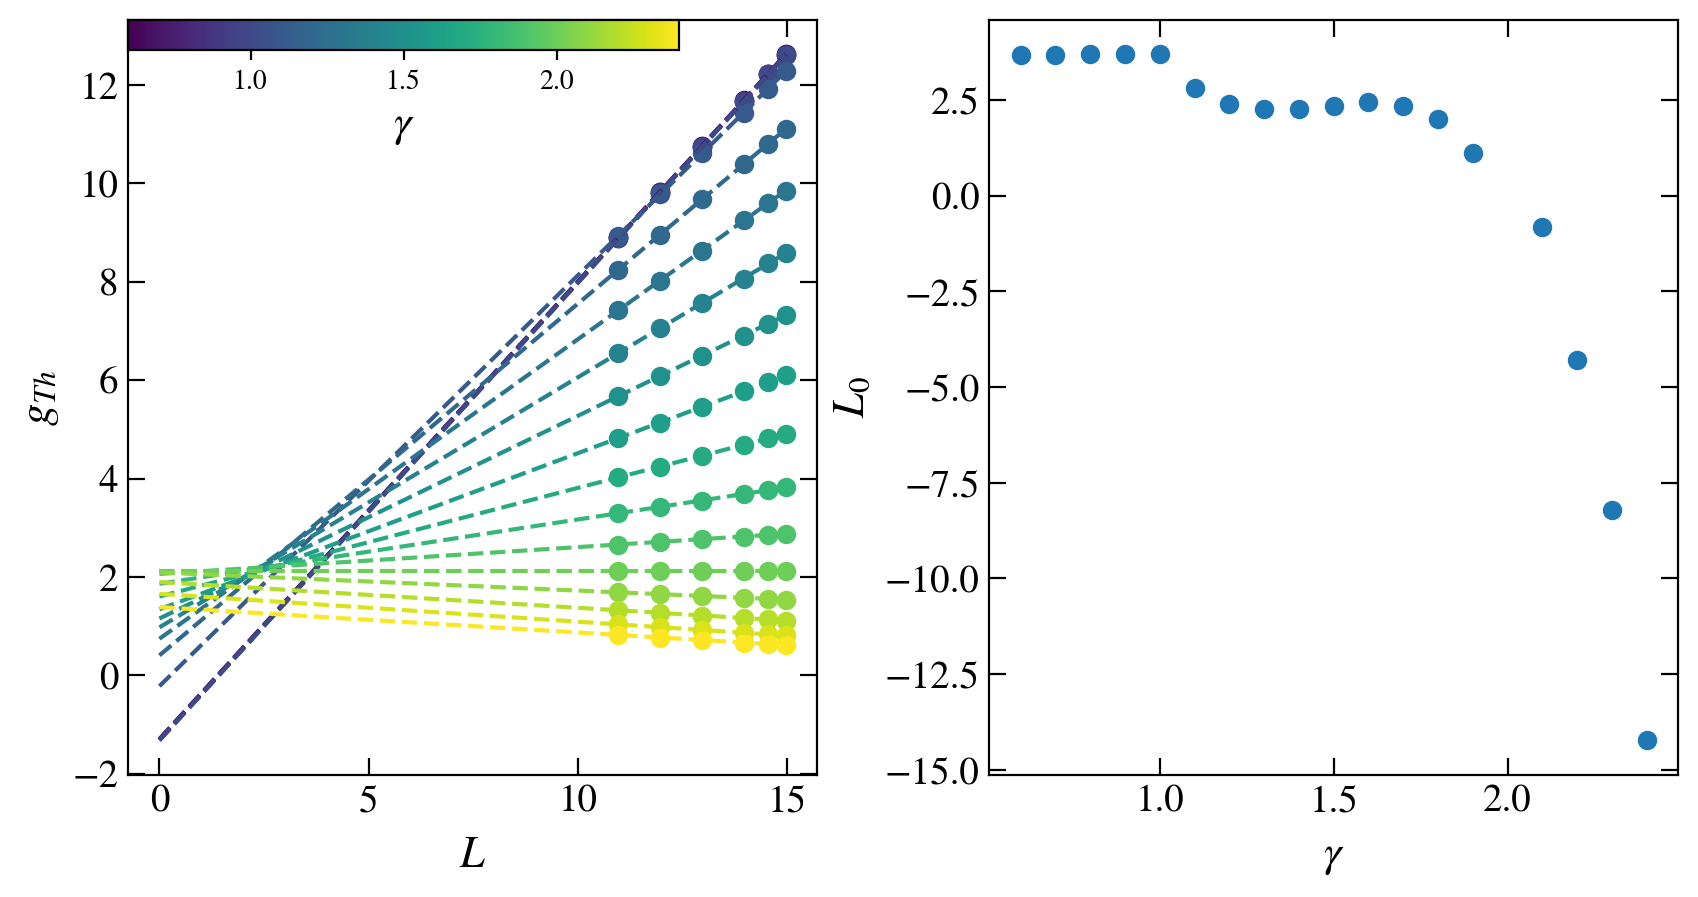

In [45]:
L=16000
J=1
w=0.5
g=1
op=1
model = 'RP'
DIM=1
BC=0

gamma_vals = np.linspace(0.1, 3.0, 30)
print(gamma_vals)

g_crit = 2
gth_crit = 2.1217823191307117
nu = 1

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200)

use_collapse = 0
use_input_crit_point = 0
use_two_parameter_ansatz = 0

interpolate = 0
use_fit = 1

delta=1
bin_size = 5


gmax = 100

def th_fit(L, xi, L0):
    # return A * g / xi
    return (L - L0) / xi + gth_crit

def th_fit2(L, xi, L0):
    return -(L - L0) / xi + gth_crit 
    # return -g / xi + A

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)
    
ylab = r"$\beta(X)$"

g_min = 0.6
g_max = 2.5


sizes = np.array([2000, 4000, 8000, 16000, 24000, 32000])
ln_sizes = np.log2(sizes)

norm = matplotlib.colors.Normalize(
    vmin=np.min(ln_sizes),
    vmax=np.max(ln_sizes))


# create a ScalarMappable and initialize a data structure
s_m_L = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m_L.set_array([])

ydata = []
for L in sizes:
    t_Th    = None
    tH      = None
    tH_typ  = None
    name_out = folder + f'_L={L}.hdf5'
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            gamma_vals  = np.array(file.get('interaction'))
            tH         = np.array(file.get('heisenberg time'))#* np.sqrt(1 + (L+1) * L**(-gamma_vals))
            tH_typ     = np.array(file.get('typical heisenberg time'))
            t_Th       = np.array(file.get('thouless time'))
    else:
        print(name_out)
    
    indices = np.where(np.logical_and(gamma_vals >= g_min, gamma_vals < g_max))[0]
    gamma_vals = gamma_vals[indices]
    t_Th = (tH * t_Th)[indices]
    tH = tH[indices]

    g_th = np.log2( tH / t_Th )
    ydata.append(g_th)
    
ydata = np.transpose( np.array(ydata) )

norm = matplotlib.colors.Normalize(
    vmin=np.min(gamma_vals),
    vmax=np.max(gamma_vals))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])
L0s = []
L0 = 0
for ii, g in enumerate(gamma_vals):
    my_fit = th_fit if g <= 2 else th_fit2
    col = s_m.to_rgba(g)
    xx = ln_sizes
    yy = ydata[ii]
    pars, pconv, fit_info, msg, _ = fit(my_fit,
                        xdata = xx,
                        ydata = yy,
                        full_output=True, maxfev=10000)
    L0 = 0 if g==2 else pars[-1]
    x = np.linspace(0, max(ln_sizes))
    axis[0].scatter(xx - 0*L0, yy, color=col)
    axis[0].plot(    x - 0*L0, my_fit(x, *pars), color=col, ls='--')
    if g == 2:
        L0s.append(np.nan)
        continue
    L0s.append(L0)

x = np.log2(sizes)
axis[1].scatter(gamma_vals, L0s)
fig_help.set_plot_elements(axis[0], ylabel=r"$g_{Th}$", xlabel=r"$L$", font_size=14, set_legend=False, yscale='linear')
fig_help.set_plot_elements(axis[1], ylabel=r"$L_0$", xlabel=r"$\gamma$", font_size=14, set_legend=False, yscale='linear', xscale = 'linear')

cbaxes = axis[0].inset_axes([0.0, 0.96, 0.8, 0.04])
cbar = fig.colorbar(s_m, cax = cbaxes, orientation='horizontal')

cbar.set_label(r"$\gamma$", fontsize=16)

fig.subplots_adjust(wspace = 0.25, hspace=0.05)

## DOS

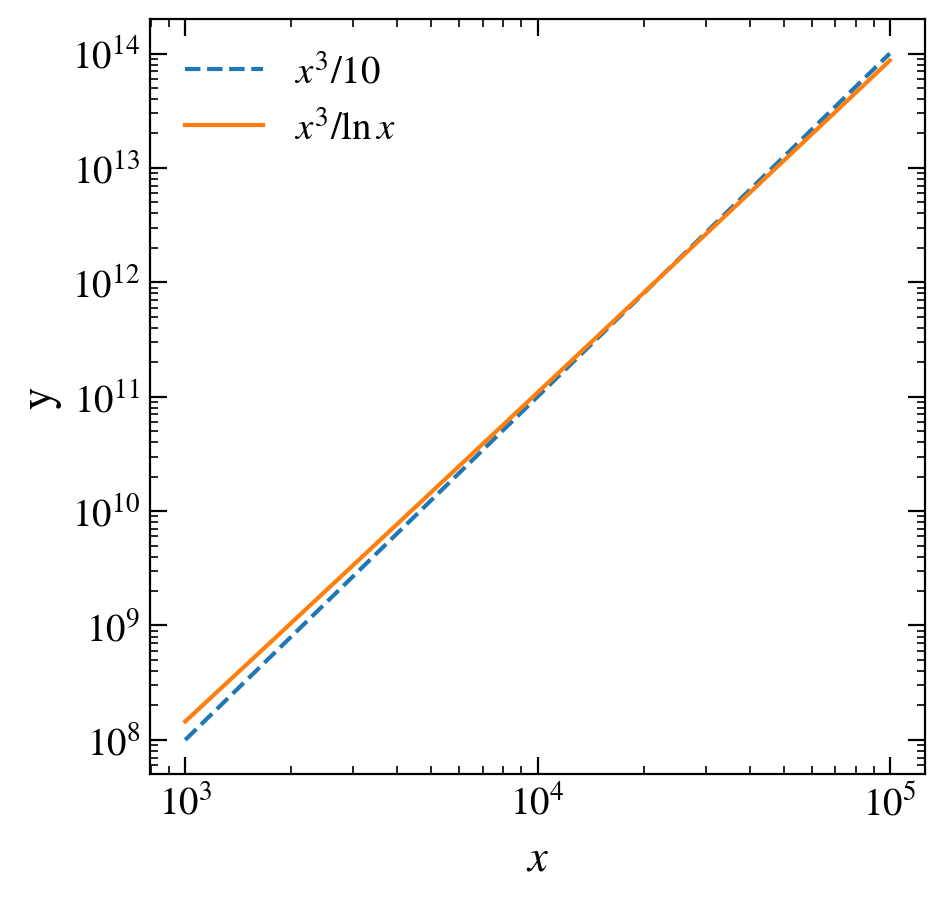

In [258]:
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True, sharey=True)

x = np.logspace(3, 5, 10000)
axis.plot(x, x**3 / 10, ls= '--', label=r'$x^3/10$')
axis.plot(x, x**3 / np.log(x),    label=r'$x^3/\ln{x}$')
fig_help.set_plot_elements(axis, ylabel=r"y", xlabel=r"$x$", font_size=14, set_legend=True, xscale='log', yscale='log')

No handles with labels found to put in legend.


5.0 0.40126005384379815 3.9483379575492834
2.5 0.3000889333147438 3.999617559689521
2.0 0.24828341526775316 4.081436021116444
1.25 0.09305397900281037 4.894483588063143


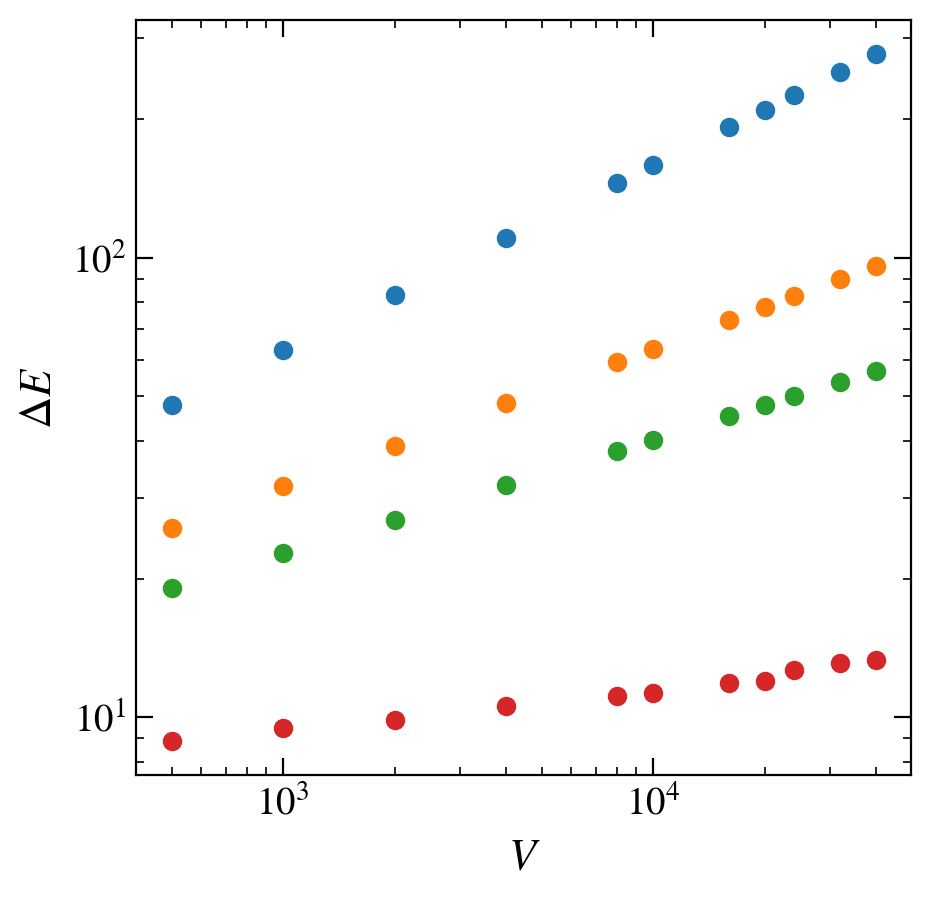

In [9]:
sizes = np.array([500, 1000, 2000, 4000, 8000, 10000, 16000, 20000, 24000, 32000, 40000])

bandwidth_g02 = np.array( [47.6888, 63.0956, 83.0605, 110.1486, 145.5653, 159.0748, 192.1736, 209.9926, 226.12, 253.6002, 277.1132] )
bandwidth_g04 = np.array( [25.8442, 31.8507, 38.9838, 48.2193, 59.3598, 63.4299, 73.0779, 78.0919, 82.5592, 89.9633, 96.1118] )
bandwidth_g05 = np.array( [19.146, 22.7624, 26.8268, 32.0085, 37.9906, 40.138, 45.1437, 47.7011, 49.9634, 53.6577, 56.6722] )
bandwidth_g08 = np.array( [8.8904, 9.4487, 9.8726, 10.5947, 11.1428, 11.2984, 11.8485, 11.994, 12.664, 13.1398, 13.3298] )

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True, sharey=True)


gs = [0.2, 0.4, 0.5, 0.8]
for ii, band in enumerate( [bandwidth_g02, bandwidth_g04, bandwidth_g05, bandwidth_g08] ):
    # band = band / band[0]
    pars, pconv, fit_info, msg, _ = fit(power_law,
                        xdata = sizes,
                        ydata = band,
                        full_output=True, maxfev=10000)
    print(1/gs[ii], *pars)
    yy = band# / np.sqrt(1 + (sizes + 1) * sizes**(-gs[ii]))
    axis.scatter(sizes, yy)

# axis.plot(sizes, (sizes / sizes[0])**0.5, ls='--', c='k')/\sqrt{1+V^{1-\gamma}}

fig_help.set_plot_elements(axis, ylabel=r"$\Delta E$", xlabel=r"$V$", font_size=14, set_legend=True, xscale='log', yscale='log')

In [276]:
a = np.array([1,-2])
b = np.array([-3,-5])
a*b
28**3

21952

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5]
0.1 0.0645887060015324 3.8954447543550623
0.2 0.06552358888231548 3.8721570782872887
0.3 0.06623492304196299 3.859017769566328
0.4 0.06470716776220163 3.9254441396030204
0.5 0.06532237416740198 3.918785542117887
0.6 0.06680553040746202 3.871298467654933
0.7 0.0670495135805151 3.868788673711741
0.7999999999999999 0.07111839995108606 3.610966466380445
0.8999999999999999 0.04611778520323461 4.033172132723154
0.9999999999999999 0.012426482881680264 4.694975437779337
1.0999999999999999 0.10100681085667408 2.034070477533021
1.2 0.2258192099519525 1.1988993779666774
1.3 0.3419878006878729 0.8565156341294764
1.4 0.4506985193793206 0.681460497680472
1.5 0.5539376452495952 0.5719572458999872
1.5999999999999999 0.6573659298670069 0.47075223136515726
1.7 0.7604364320687408 0.37653661568405816
1.8 0.8565767118877647 0.30262501985083706
1.9 0.9412952448750592 0.24652884302800185
2.0 1.0016761899253

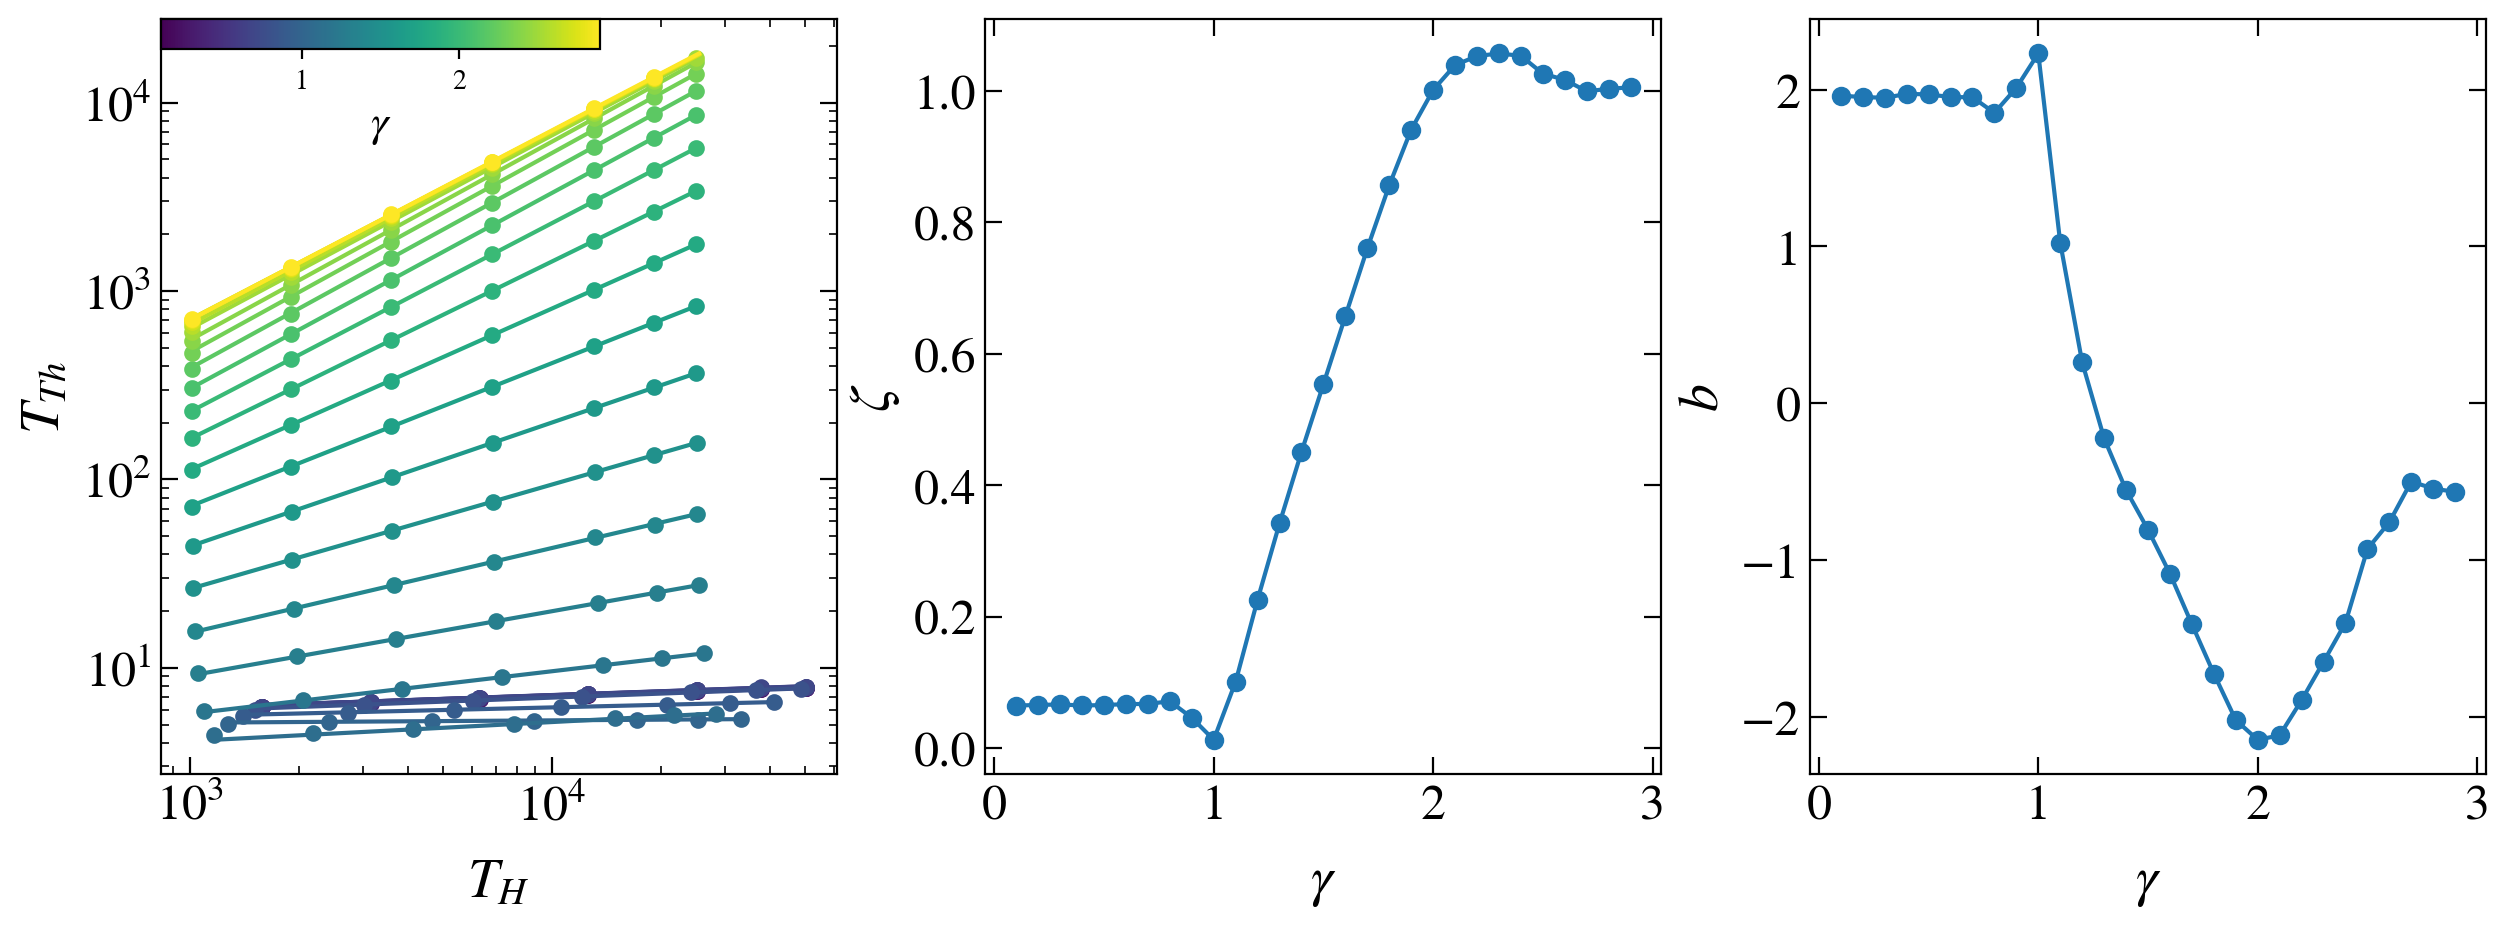

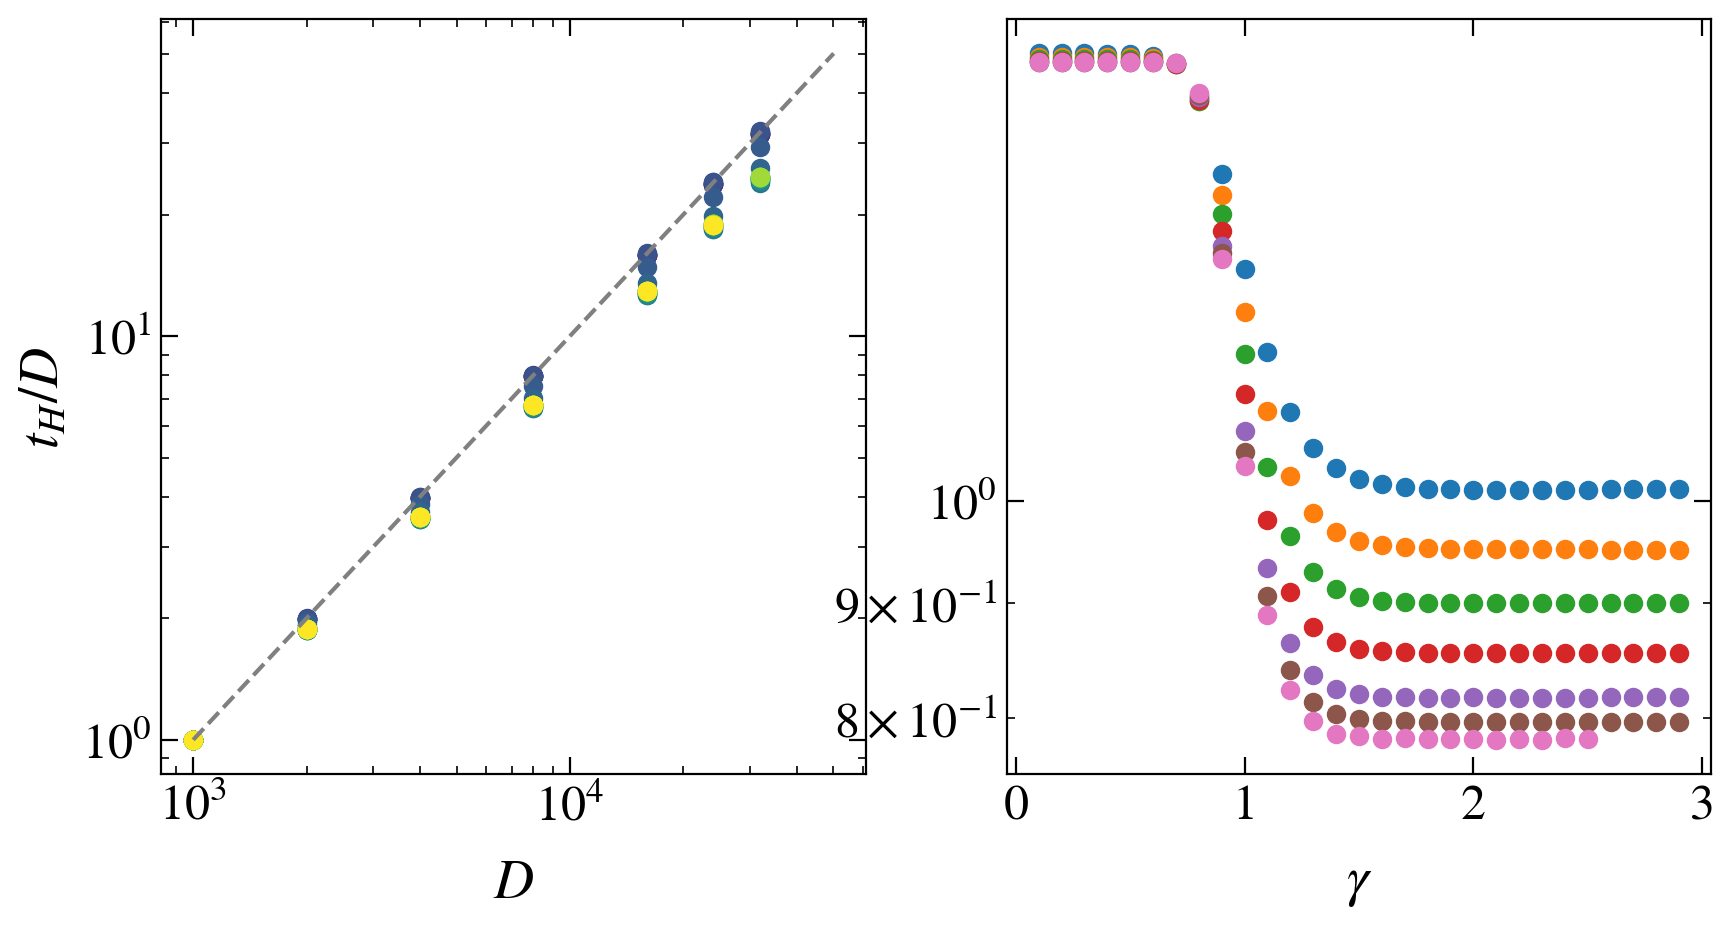

In [7]:
L=1000
J=2

gamma_vals = np.linspace(0.1, 2.5, 25)
print(gamma_vals)

fig, axes = plt.subplots( nrows=1, ncols=3, figsize=(15,5), dpi = 200)
axis = axes[0]
ax = axes[1]
ax_b = axes[2]

fig2, axH = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200)

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)

sizes = np.array([1000, 2000, 4000, 8000, 16000, 24000, 32000])
# sizes = np.array([1000, 2000, 4000, 8000])
ln_sizes = np.log2(sizes)

gamma_min = 0.1
gamma_max = 3.0

heisenberg_time = []
thouless_time = []
disorder = []
for L in sizes:
    t_Th    = None
    tH      = None
    tH_typ  = None
    name_out = folder + f'_L={L}.hdf5'
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            gamma_vals  = np.array(file.get('interaction'))
            
            indices = np.where(np.logical_and( gamma_vals >= gamma_min, gamma_vals < gamma_max ))[0]
            gamma_vals = gamma_vals[indices]
            tH         = np.array(file.get('heisenberg time'))[indices] * np.sqrt(1 + (L+1) * L**(-gamma_vals))
            tH_typ     = np.array(file.get('typical heisenberg time'))[indices]
            t_Th       = np.array(file.get('thouless time'))[indices]
            
            axH[1].scatter(gamma_vals, tH / L)
    else:
        print(name_out)
    
    thouless_time.append(t_Th * tH)
    disorder.append(gamma_vals)
    heisenberg_time.append(tH)

thouless_time = np.array(thouless_time)
heisenberg_time = np.array(heisenberg_time)

norm = matplotlib.colors.Normalize(
    vmin=np.min(gamma_vals),
    vmax=np.max(gamma_vals))


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

heisenberg_time = np.transpose( np.array(heisenberg_time) )
thouless_time = np.transpose( np.array(thouless_time) )

idx_c = 0

zeta = []
b = []
for ii_a, gamma in enumerate(gamma_vals):
    col = s_m.to_rgba(gamma)
    # col = s_m.to_rgba(alfa)
    xx = heisenberg_time[ii_a]
    yy = thouless_time[ii_a]
    
    #* np.sqrt(1 + sizes * sizes**(-gamma))
    axH[0].scatter(sizes, xx/xx[0] / sizes**0, color=col)
    axis.plot(xx, yy, marker='o', markersize=5, lw=0.0, ls='--', color=col) 
    
    try:
        # xx = xx - N
        pars, pconv, fit_info, msg, _ = fit(power_law,
                        xdata = xx[-5:],
                        ydata = yy[-5:],
                        full_output=True, maxfev=10000)
        # print(J, alfa, fit_info['fvec'])
        dense_sizes = np.linspace(xx[0], 4 * xx[-2]/3, 10000)
        axis.plot(dense_sizes, power_law(dense_sizes, *pars), lw=1.5, color=col, ls = '-')
        print(gamma, *pars)
        zeta.append(pars[0])
        b.append(pars[1])
    except RuntimeError:
        print(gamma, "Failed")
    
b = np.array(b)
zeta = np.array(zeta)

fig_help.set_plot_elements(axis, ylabel=r"$T_{Th}$", xlabel=r"$T_H$", font_size=18, set_legend=False, xscale='log', yscale='log')

ax.plot(gamma_vals, zeta, marker='o')
fig_help.set_plot_elements(ax, ylabel=r"$\zeta$", xlabel=r"$\gamma$", font_size=18, set_legend=False, xscale='linear', yscale='linear')

chi = 1/2 * erf(1/np.sqrt(2))
# ax_b.plot(gamma_vals, np.log2(b) - (1-zeta)*np.log2(chi), marker='o')
ax_b.plot(gamma_vals, np.log2(b), marker='o')
fig_help.set_plot_elements(ax_b, ylabel=r"$b$", xlabel=r"$\gamma$", font_size=18, set_legend=False, xscale='linear', yscale='linear')
# fig.subplots_adjust(right=0.9)

fig_help.set_plot_elements(axH[0], ylabel=r"$t_H/D$", xlabel=r"$D$", font_size=18, set_legend=False, xscale='log', yscale='log')
fig_help.set_plot_elements(axH[1], ylabel=r"", xlabel=r"$\gamma$", font_size=18, set_legend=False, xscale='linear', yscale='log')

x = np.linspace(1, 2, 100)
# ax.plot(x, x-1, ls='--', color='gray')

# ax.axvline(x=1, ls=':', c='k')
# ax.axvline(x=2, ls='--', c='k')

x = np.linspace(0, 1, 100)
chi = (1/3 - np.sqrt(3) / (4*np.pi))
# axH[0].axhline(y = chi, ls=':', color='r')
# axH[1].axhline(y = chi, ls=':', color='r')
# axH[1].plot(x, 4*chi / np.sqrt(1 + max(sizes)**(1 - x)), ls='--', c='k')
    
x = np.linspace(1, 2, 100)
chi = 1/2 * erf(1/np.sqrt(2))
# axH[0].axhline(y = chi, ls=':', color='k')
# axH[1].axhline(y = chi, ls=':', color='k')
# axH[1].plot(x, 2*chi / np.sqrt(1 + max(sizes)**(1 - x)), ls='--', c='k')
# axH.axhline(y = np.pi/2, ls=':', color='r')
x = np.logspace(3, 4.7, 100)
axH[0].plot(x, x/1e3, ls='--', color='gray')
cbaxes = axis.inset_axes([0.0, 0.96, 0.65, 0.04])
cbar = fig.colorbar(s_m, cax = cbaxes, orientation='horizontal')

cbar.set_label(r"$\gamma$", fontsize=16)
# cbar.ax.tick_params(labelsize=15)
fig.subplots_adjust(wspace = 0.22, hspace=0.2)


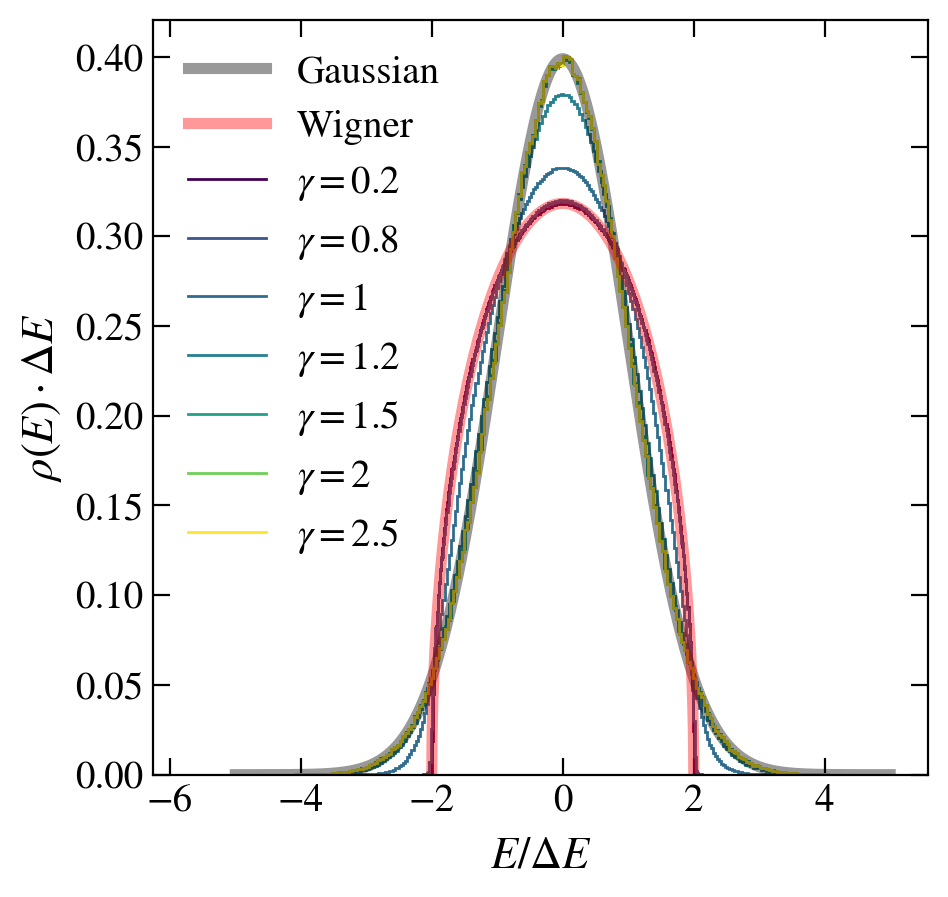

In [117]:
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=True, sharey=True)

L = 32000

gs = [0.2, 0.8, 1.0, 1.2, 1.5, 2.0, 2.5]
# gs = [0.5, 1.5]
norm = matplotlib.colors.Normalize(
    vmin=np.min(gs),
    vmax=np.max(gs))
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])
for ii, g in enumerate( gs ):
    name = f'DOS/RP/Bandwidth_g=%.2f.hdf5'%g
    if exists(name):
        with h5py.File(name, "r") as file:
            bins = np.array(file.get('bins_L=%d'%L)) / (np.sqrt(1 + L**(1-g)))
            DOS  = np.array(file.get('DOS_L=%d'%L)) * (np.sqrt(1 + L**(1-g)))
            axis.stairs(DOS, bins, label=r"$\gamma=%g$"%g, color=s_m.to_rgba(g))
    else:
        print(name)

sigma = 1#np.sqrt(1 + L**(1-g))
x = np.linspace(-5, 5, 10000)
axis.plot(x, 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-x**2/(2*sigma**2)), ls='-', lw=4, c='k', alpha=0.4, label='Gaussian')
x = np.linspace(-2, 2, 10000)
axis.plot(x, 1/(np.pi*sigma**2) * np.sqrt(sigma**2 - (x/2)**2), ls='-', lw=4, c='r', alpha=0.4, label='Wigner')



fig_help.set_plot_elements(axis, ylabel=r"$\rho(E)\cdot\Delta E$", xlabel=r"$E/\Delta E$", font_size=14, set_legend=True, xscale='linear', yscale='linear')

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5]


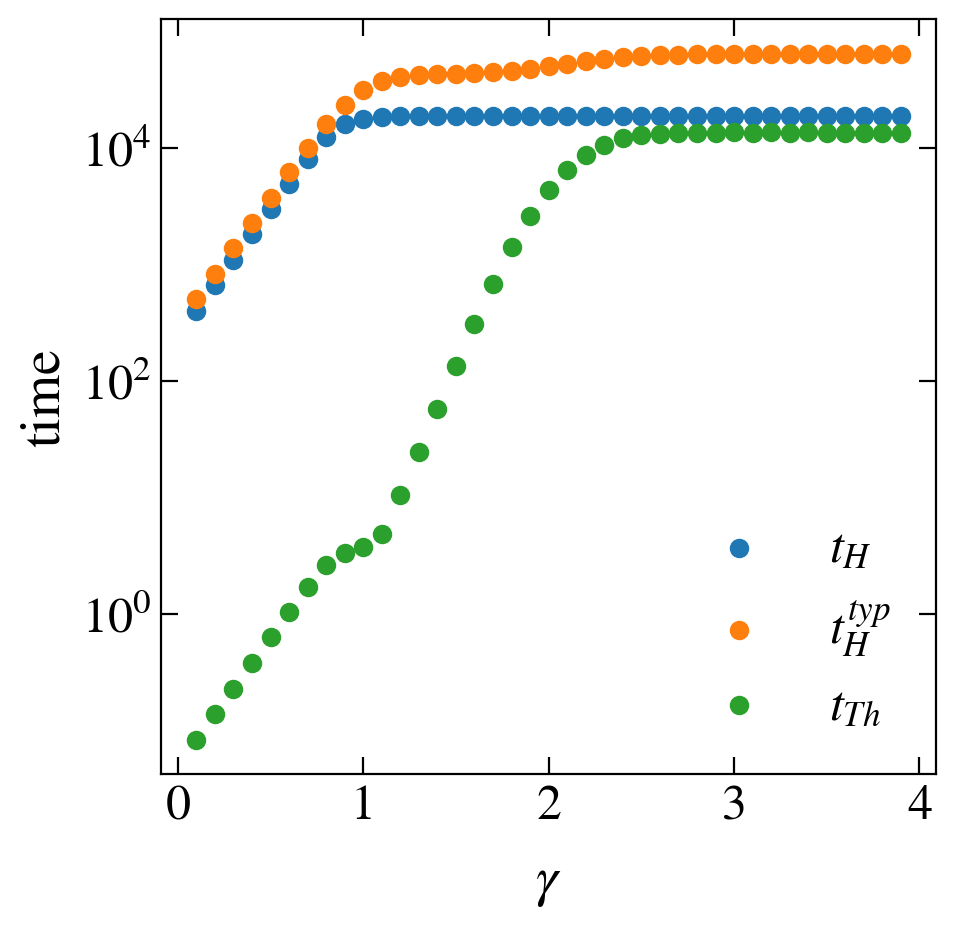

In [294]:
L=1000
J=2

gamma_vals = np.linspace(0.1, 2.5, 25)
print(gamma_vals)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

folder = f'./thouless time/'
os.makedirs(folder, exist_ok=True)

sizes = np.array([1000, 2000, 4000, 8000, 16000, 24000, 32000])
# sizes = np.array([1000, 2000, 4000, 8000])
ln_sizes = np.log2(sizes)

sizes = [24000]

gamma_min = 0.1
gamma_max = 4.0

heisenberg_time = []
thouless_time = []
disorder = []
for L in sizes:
    t_Th    = None
    tH      = None
    tH_typ  = None
    name_out = folder + f'_L={L}.hdf5'
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            gamma_vals  = np.array(file.get('interaction'))
            
            indices = np.where(np.logical_and( gamma_vals >= gamma_min, gamma_vals < gamma_max ))[0]
            gamma_vals = gamma_vals[indices]
            tH         = np.array(file.get('heisenberg time'))[indices] #* np.sqrt(1 + (L+1) * L**(-gamma_vals))
            tH_typ     = np.array(file.get('typical heisenberg time'))[indices] #* np.sqrt(1 + (L+1) * L**(-gamma_vals))
            t_Th       = np.array(file.get('thouless time'))[indices]
            
            axis.scatter(gamma_vals, tH       , label = r"$t_{H}$"  )
            axis.scatter(gamma_vals, tH_typ   , label = r"$t_H^{typ}$"  )
            axis.scatter(gamma_vals, t_Th * tH, label = r"$t_{Th}$"  )
    else:
        print(name_out)
    
    

fig_help.set_plot_elements(axis, ylabel=r"time", xlabel=r"$\gamma$", font_size=18, set_legend=True, xscale='linear', yscale='log')

fig.subplots_adjust(wspace = 0.3, hspace=0.2)
